# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 05.10.2023

Мягкий дедлайн: 23:59MSK 18.10.2023

Жесткий дедлайн: 23:59MSK 22.10.2022

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: 11.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [2]:
!pip install folium

Defaulting to user installation because normal site-packages is not writeable


In [1]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

np.random.seed(0)

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [94]:
data = pd.read_csv("train.csv")
data.head()

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435

Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [95]:
data = data.drop(columns=['dropoff_datetime'])

In [96]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

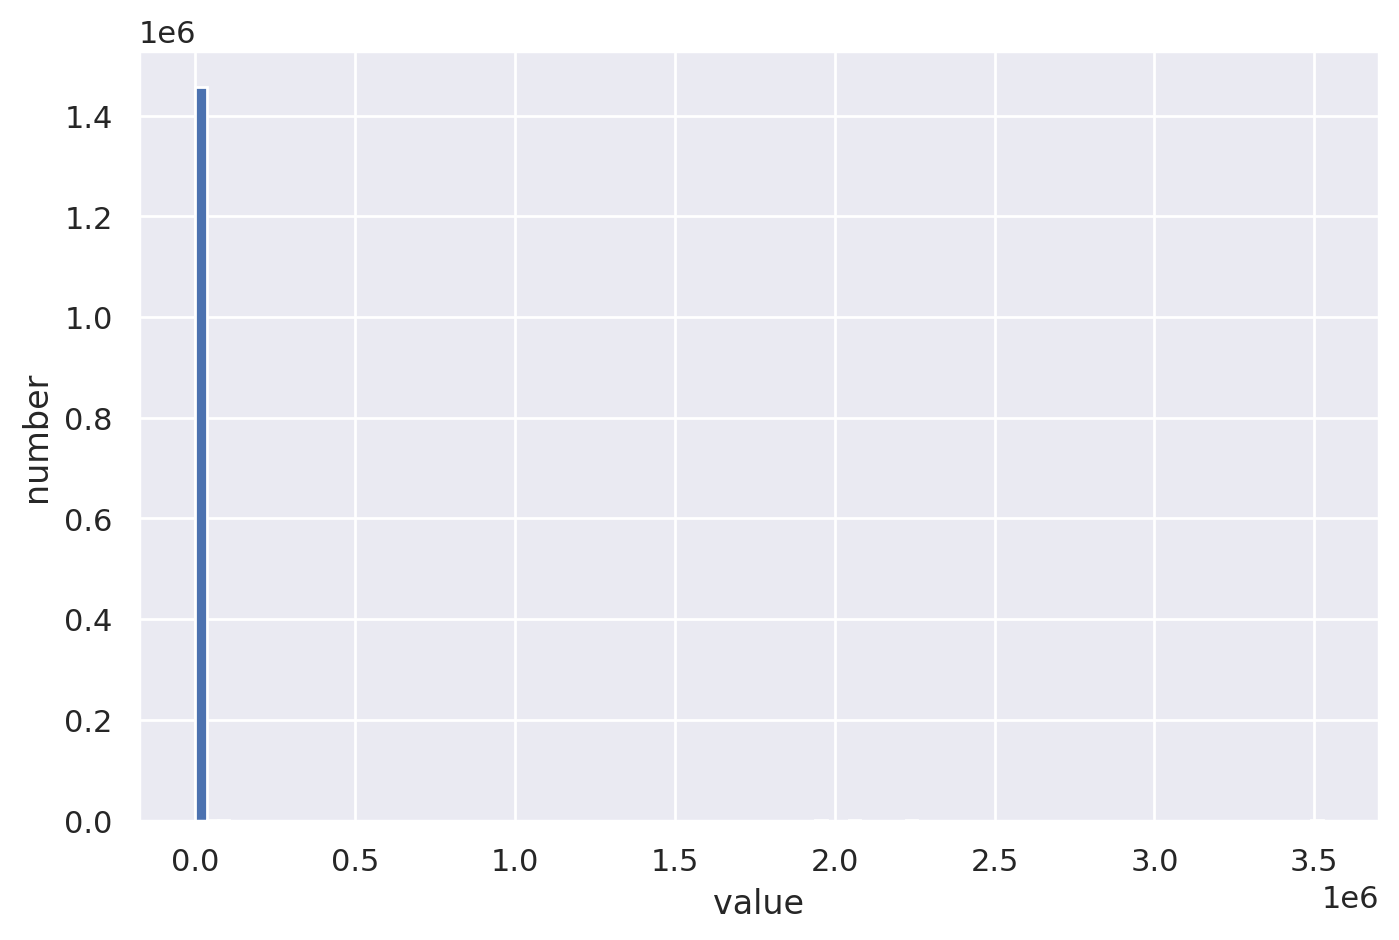

In [97]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 7.5
sns.set_style('darkgrid')

plt.hist(data['trip_duration'], bins=100)
plt.xlabel('value')
plt.ylabel('number')
plt.show()

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

Есть очень мало долгих поездок, из-за которых график растягивается и маленькие значения сливаются в одну кучу, лучше взять log

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

Rmse со скробью на душе относится к выбросам, а rmsle с ними живется проще

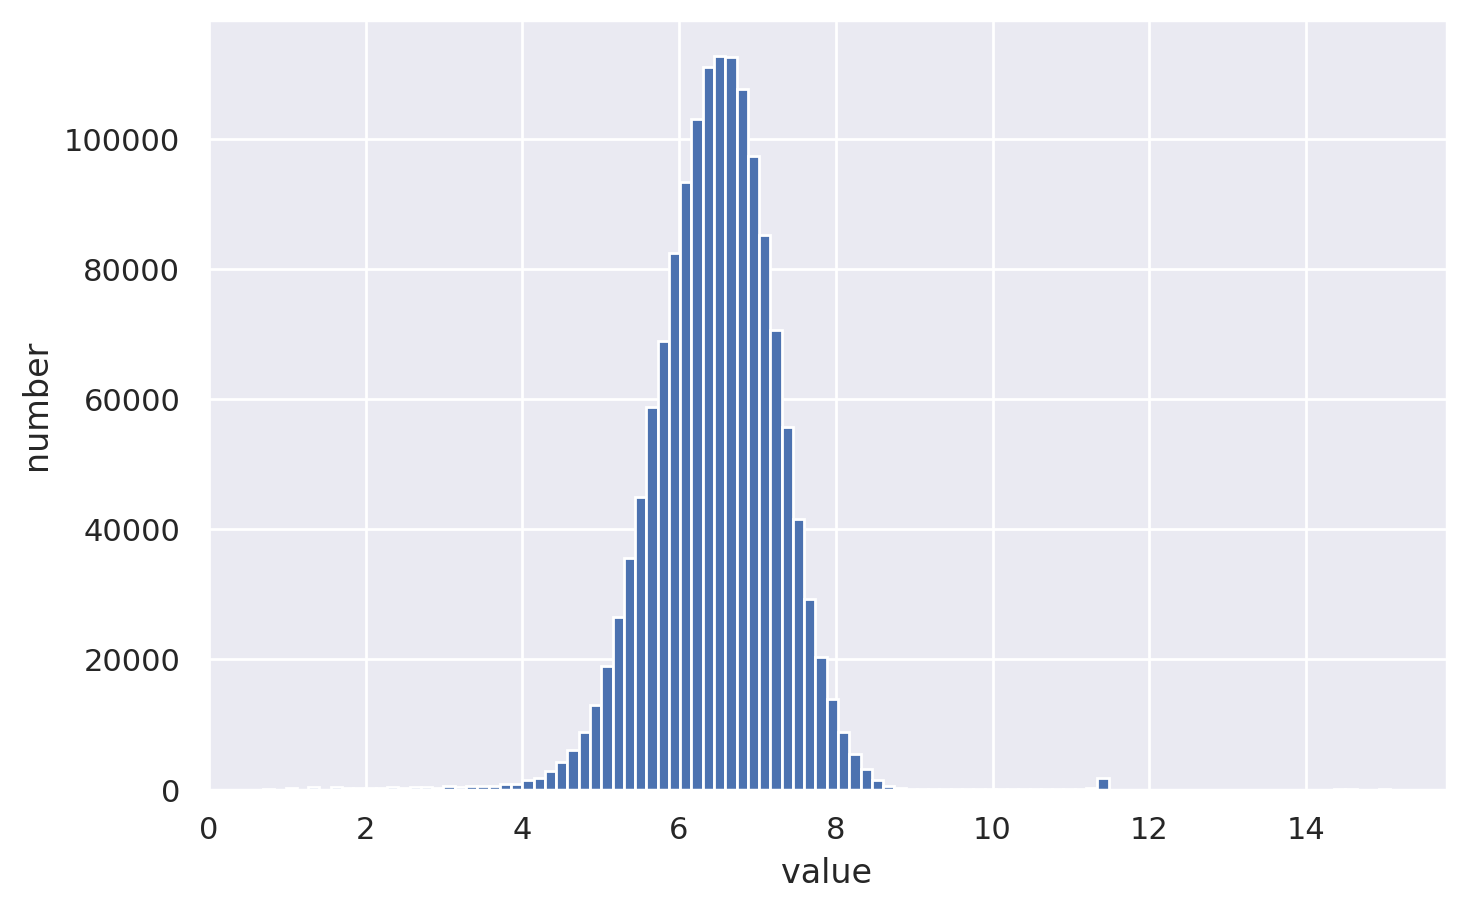

In [98]:
plt.hist(np.log1p(data['trip_duration']), bins=100)
plt.xlabel('value')
plt.ylabel('number')
plt.show()

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: Гугл говорит следующее:

$$
RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^{n} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}
$$

А так как мы провели замены на логарифм, то это складывается в:

$$\sqrt{\frac{1}{n}\sum_{i=1}^{n} \big(\hat{y}_i - \hat{a}(x_i)\big)^2}$$

Что в точности равно корню из mse (с заменами $y \rightarrow \hat{y} $, $a \rightarrow \hat{a} $)

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

In [99]:
if 'trip_duration' in data: #чтобы не было больно перезапускать
    data['log_trip_duration'] = np.log1p(data['trip_duration'])
    data = data.drop(columns=['trip_duration'])
data['log_trip_duration']

0          6.122493
1          6.498282
2          7.661527
3          6.063785
4          6.077642
             ...   
1458639    6.658011
1458640    6.486161
1458641    6.639876
1458642    5.924256
1458643    5.293305
Name: log_trip_duration, Length: 1458644, dtype: float64

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def rmsle(log1p_y_true, log1p_y_pred):
    return np.sqrt(mean_squared_error(log1p_y_true, log1p_y_pred))

best_value = np.array([data['log_trip_duration'].mean()] * data.shape[0])
rmsle_best_const = rmsle(data['log_trip_duration'], best_value)
print(rmsle_best_const)
assert np.allclose(rmsle_best_const, 0.79575, 1e-4)

0.7957592365411509


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

<Axes: title={'center': 'pickups per day'}, xlabel='pickup_datetime'>

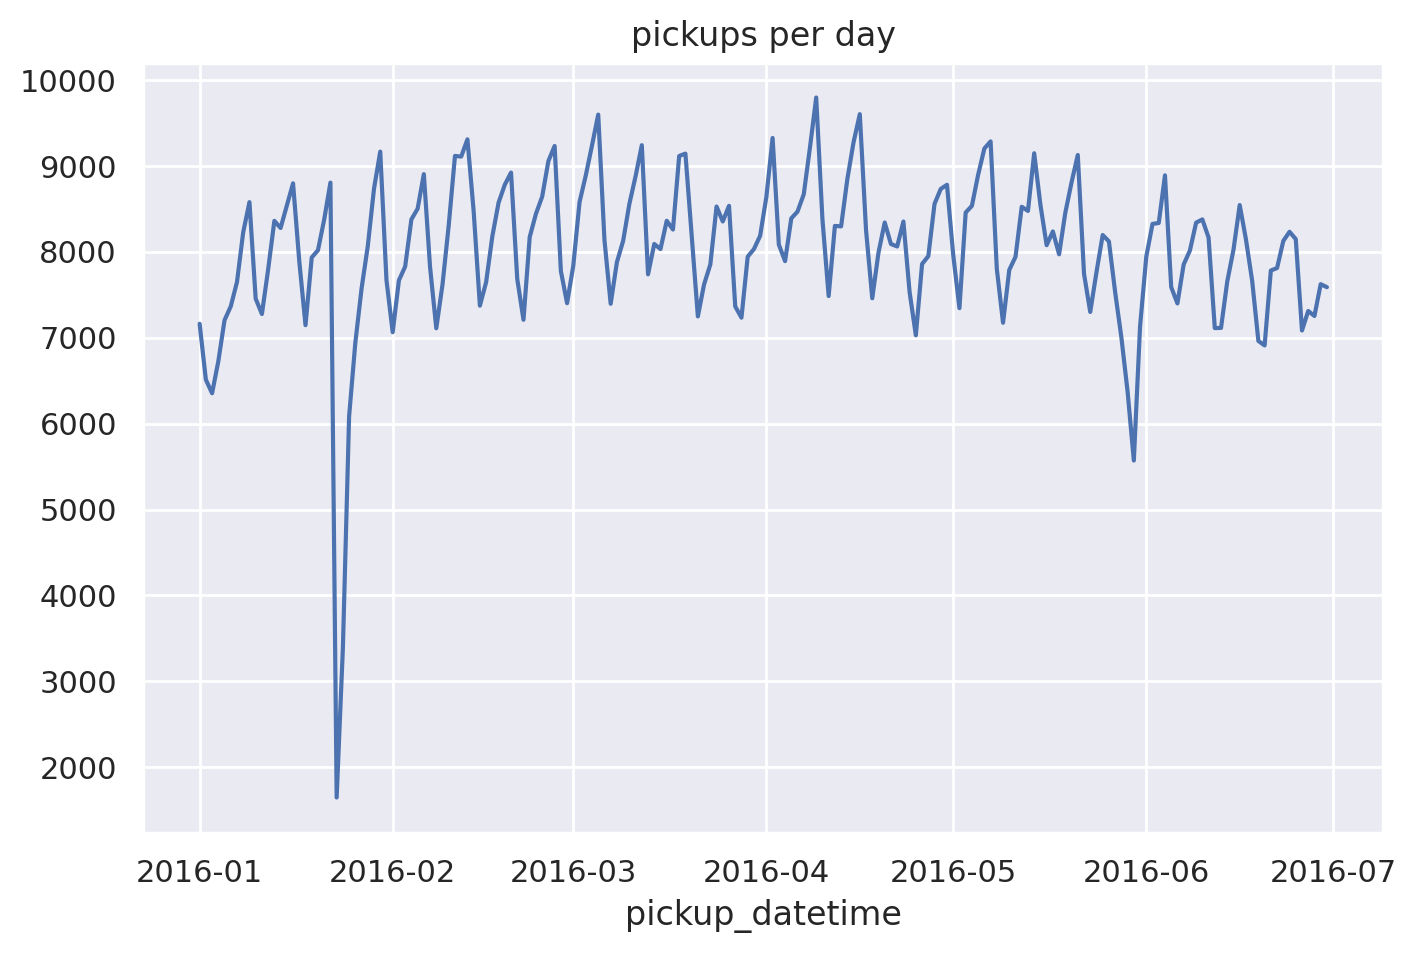

In [101]:
days = data.groupby(data['pickup_datetime'].dt.date).count()
days['pickup_datetime'].plot(title="pickups per day")

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

In [102]:
days = days.sort_values('id')
days.head(10)

id  vendor_id  pickup_datetime  passenger_count  \
pickup_datetime                                                      
2016-01-23       1648       1648             1648             1648   
2016-01-24       3383       3383             3383             3383   
2016-05-30       5570       5570             5570             5570   
2016-01-25       6084       6084             6084             6084   
2016-01-03       6353       6353             6353             6353   
2016-05-29       6372       6372             6372             6372   
2016-01-02       6512       6512             6512             6512   
2016-01-04       6725       6725             6725             6725   
2016-06-20       6910       6910             6910             6910   
2016-01-26       6941       6941             6941             6941   

                 pickup_longitude  pickup_latitude  dropoff_longitude  \
pickup_datetime                                                         
2016-01-23                   1648             1648               1648   
2016-01-24                   3383             3383               3383   
2016-05-30                   5570             5570               5570   
2016-01-25                   6084             6084               6084   
2016-01-03                   6353             6353               6353   
2016-05-29                   6372             6372               6372   
2016-01-02                   6512             6512               6512   
2016-01-04                   6725             6725               6725   
2016-06-20                   6910             6910               6910   
2016-01-26                   6941             6941               6941   

                 dropoff_latitude  store_and_fwd_flag  log_trip_duration  
pickup_datetime                                                           
2016-01-23                   1648                1648               1648  
2016-01-24                   3383                3383               3383  
2016-05-30                   5570                5570               5570  
2016-01-25                   6084                6084               6084  
2016-01-03                   6353                6353               6353  
2016-05-29                   6372                6372               6372  
2016-01-02                   6512                6512               6512  
2016-01-04                   6725                6725               6725  
2016-06-20                   6910                6910               6910  
2016-01-26                   6941                6941               6941

2016-01-23, 2016-01-24 — Снегопады в США в январе 2016 года, 2016-05-30 не гуглится вроде не знаю(

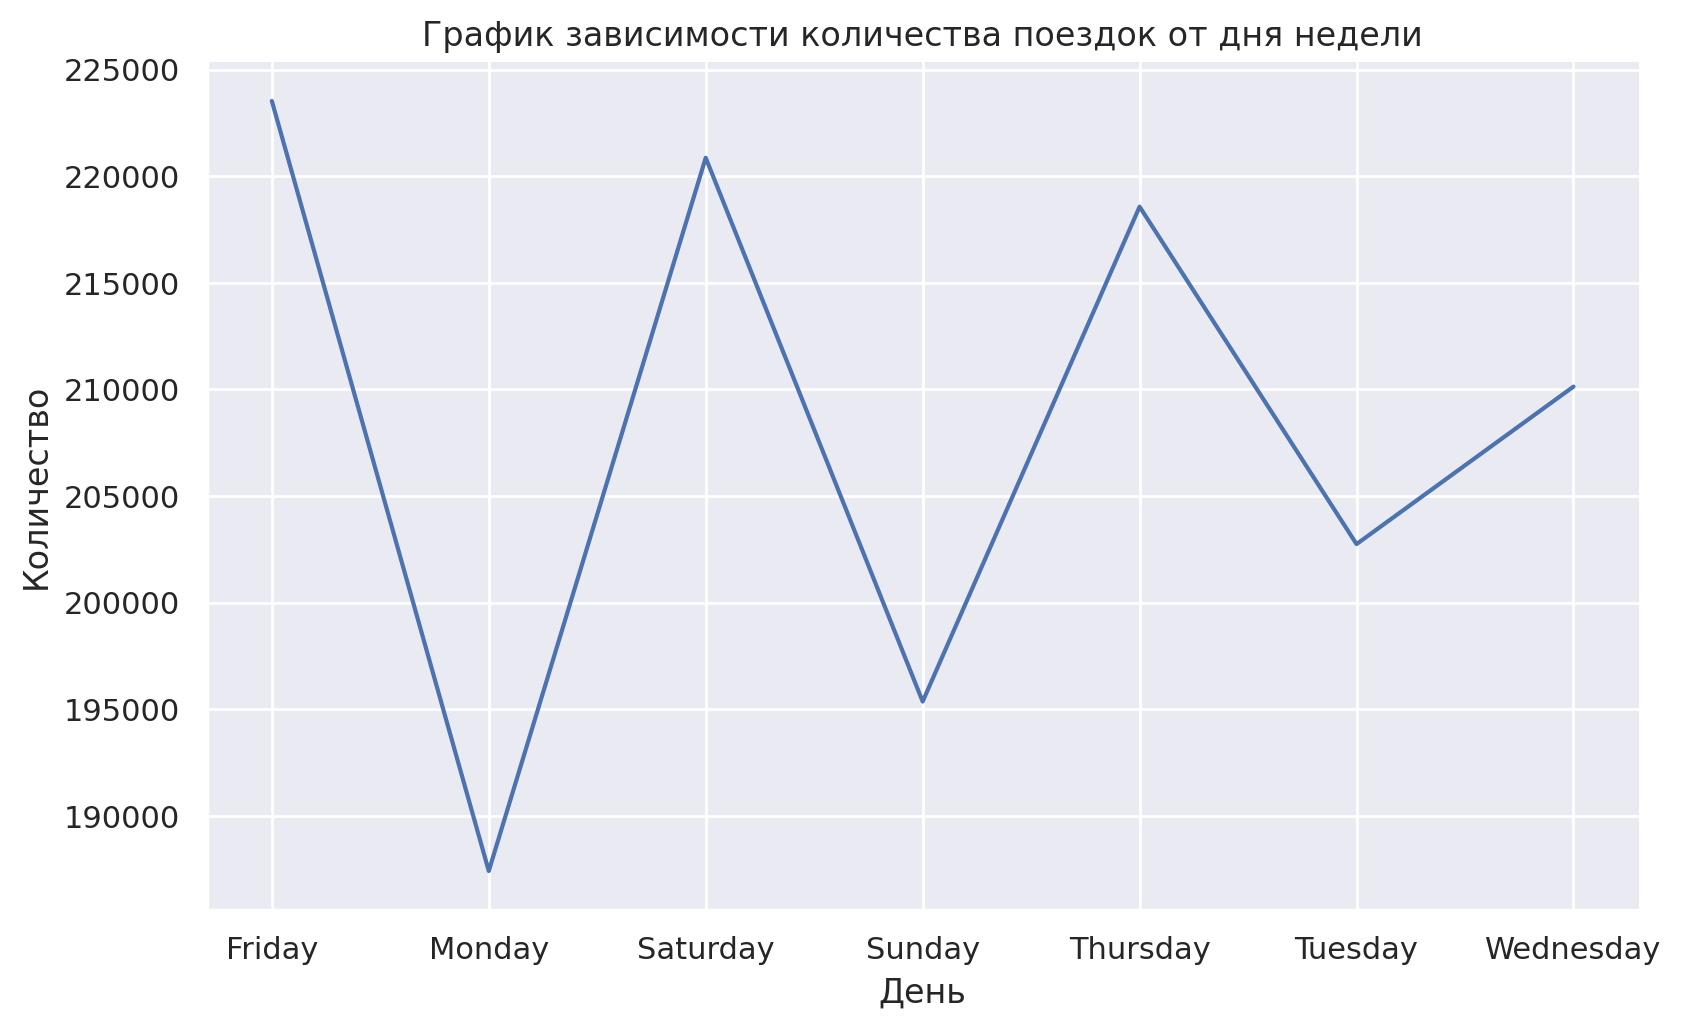

In [103]:
import warnings
warnings.filterwarnings('ignore')

days = data.groupby(data['pickup_datetime'].dt.day_name()).count()
# days['id']
sns.relplot(data=days['id'], kind='line').fig.set_size_inches(10, 5)
plt.title('График зависимости количества поездок от дня недели')
plt.xlabel('День')
plt.ylabel('Количество')
plt.show()

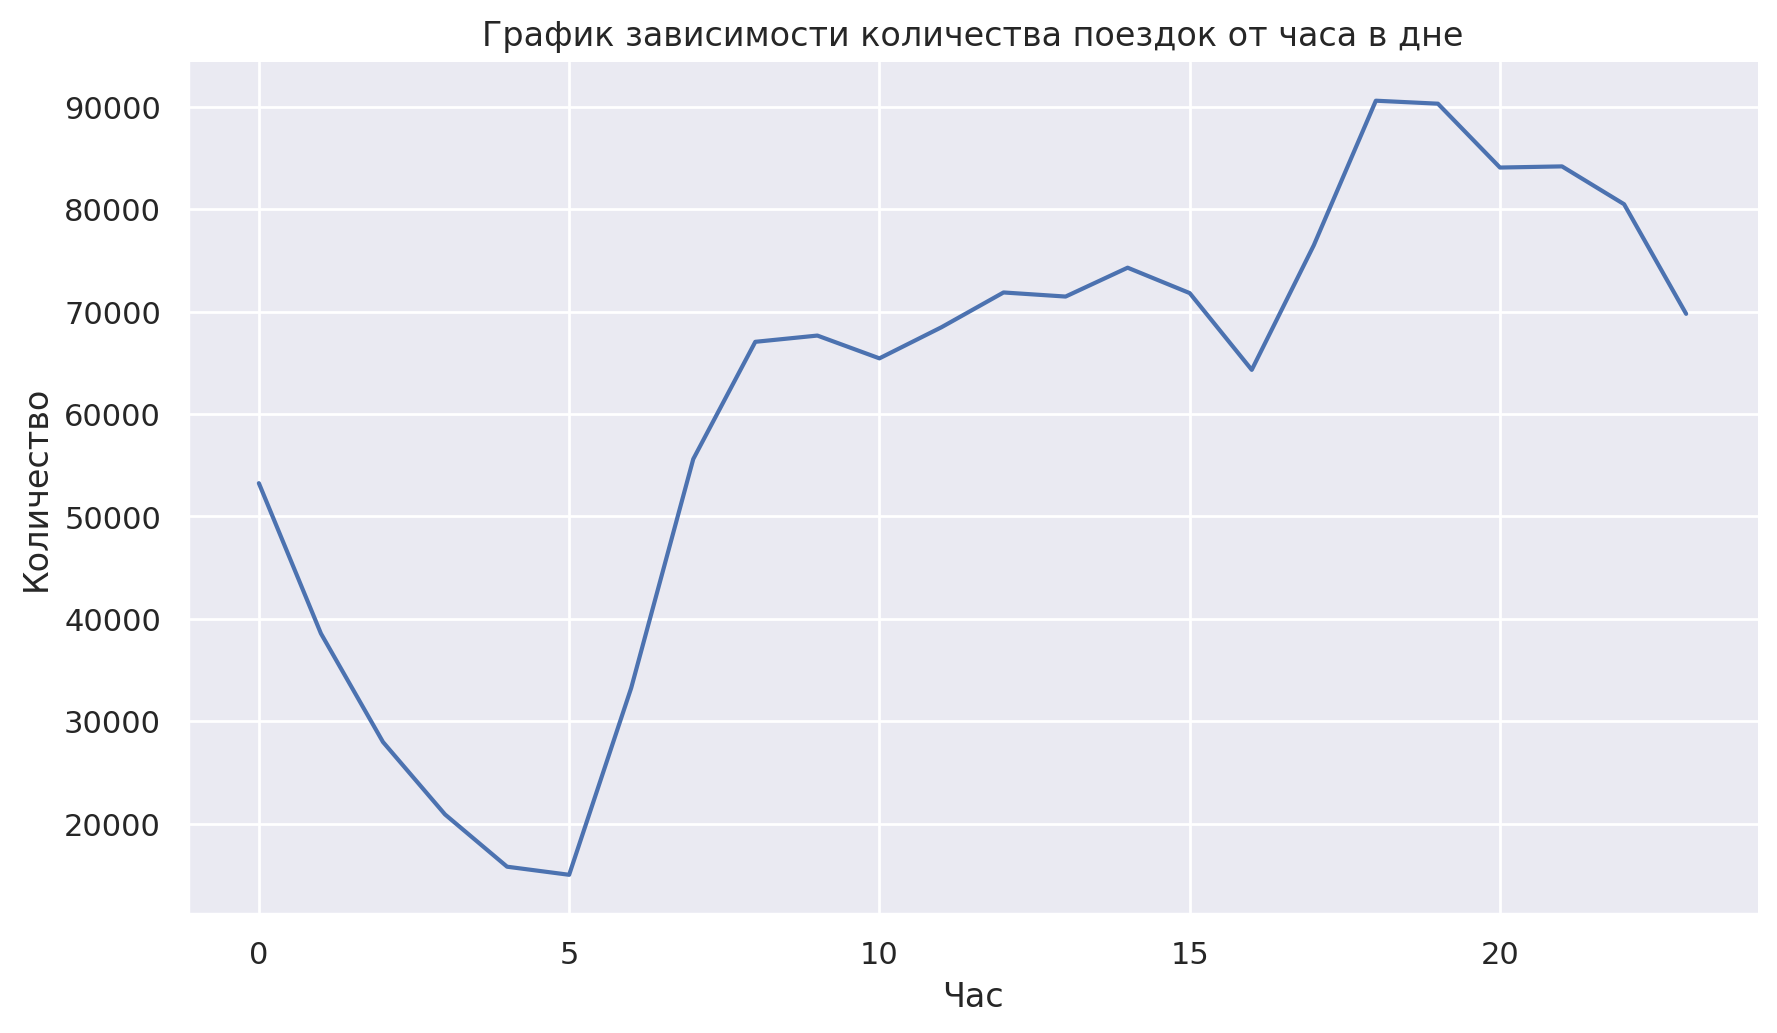

In [104]:
hours = data.groupby(data['pickup_datetime'].dt.hour).count()
# days['id']
sns.relplot(data=hours['id'], kind='line').fig.set_size_inches(10, 5)
plt.title('График зависимости количества поездок от часа в дне')
plt.xlabel('Час')
plt.ylabel('Количество')
plt.show()

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

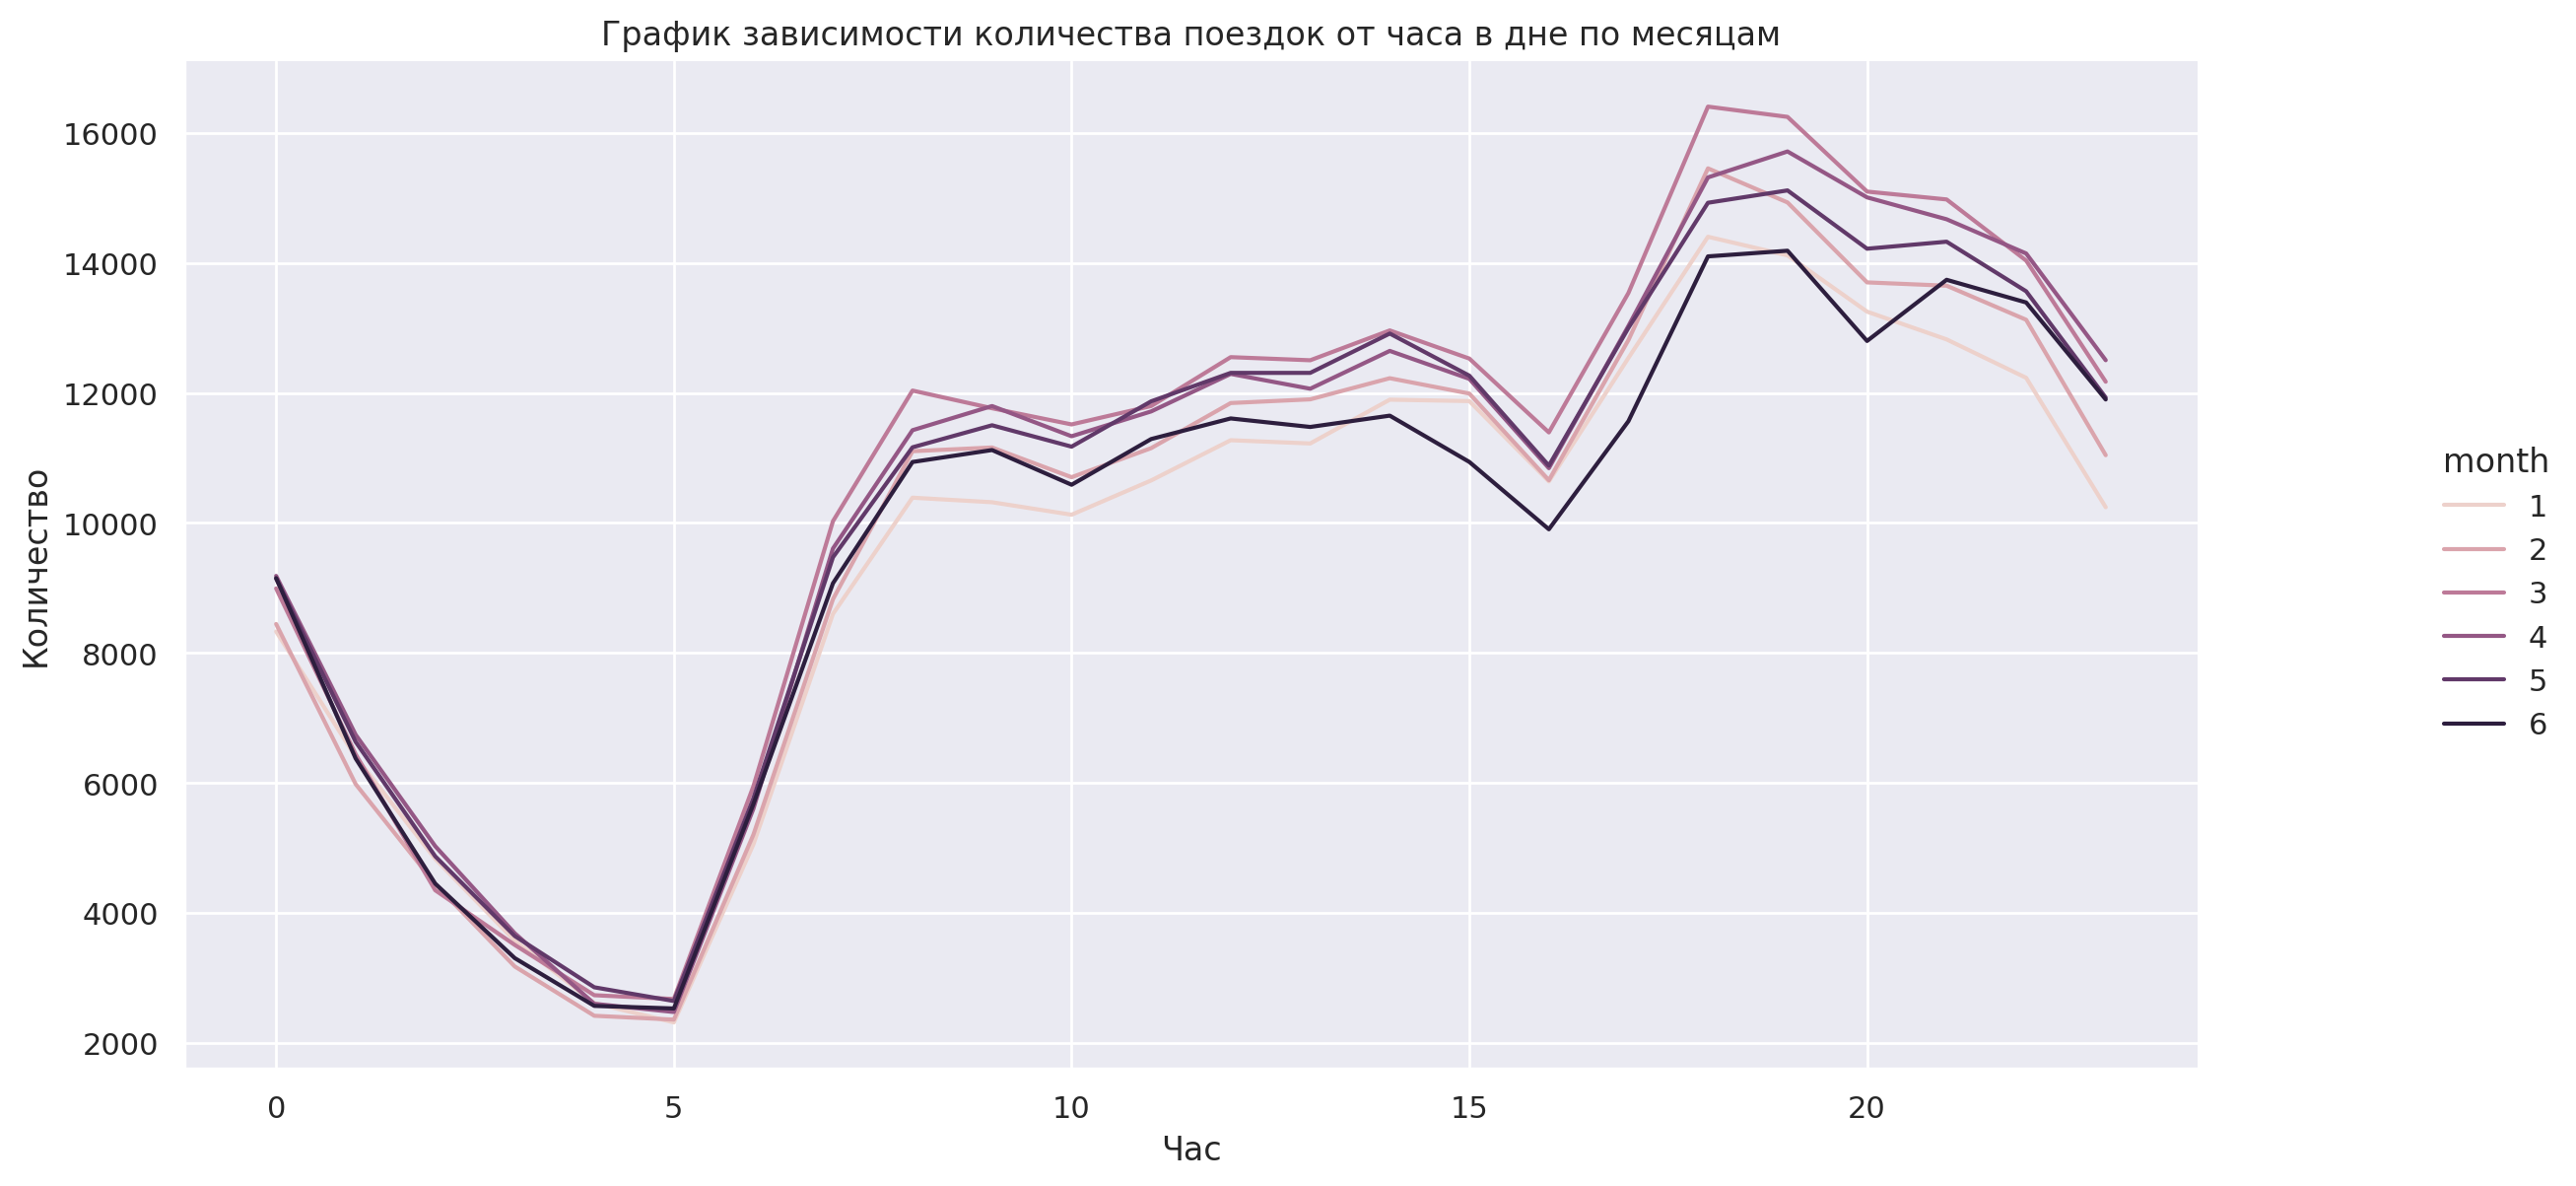

In [105]:
hours = data
hours['hour'], hours['month'] = hours['pickup_datetime'].dt.hour, hours['pickup_datetime'].dt.month
hours = hours.groupby(['month', 'hour'], as_index=False).count()
sns.relplot(hours, x='hour', y='id', hue='month', kind='line').fig.set_size_inches(15, 6)
plt.title('График зависимости количества поездок от часа в дне по месяцам')
plt.xlabel('Час')
plt.ylabel('Количество')
plt.show()

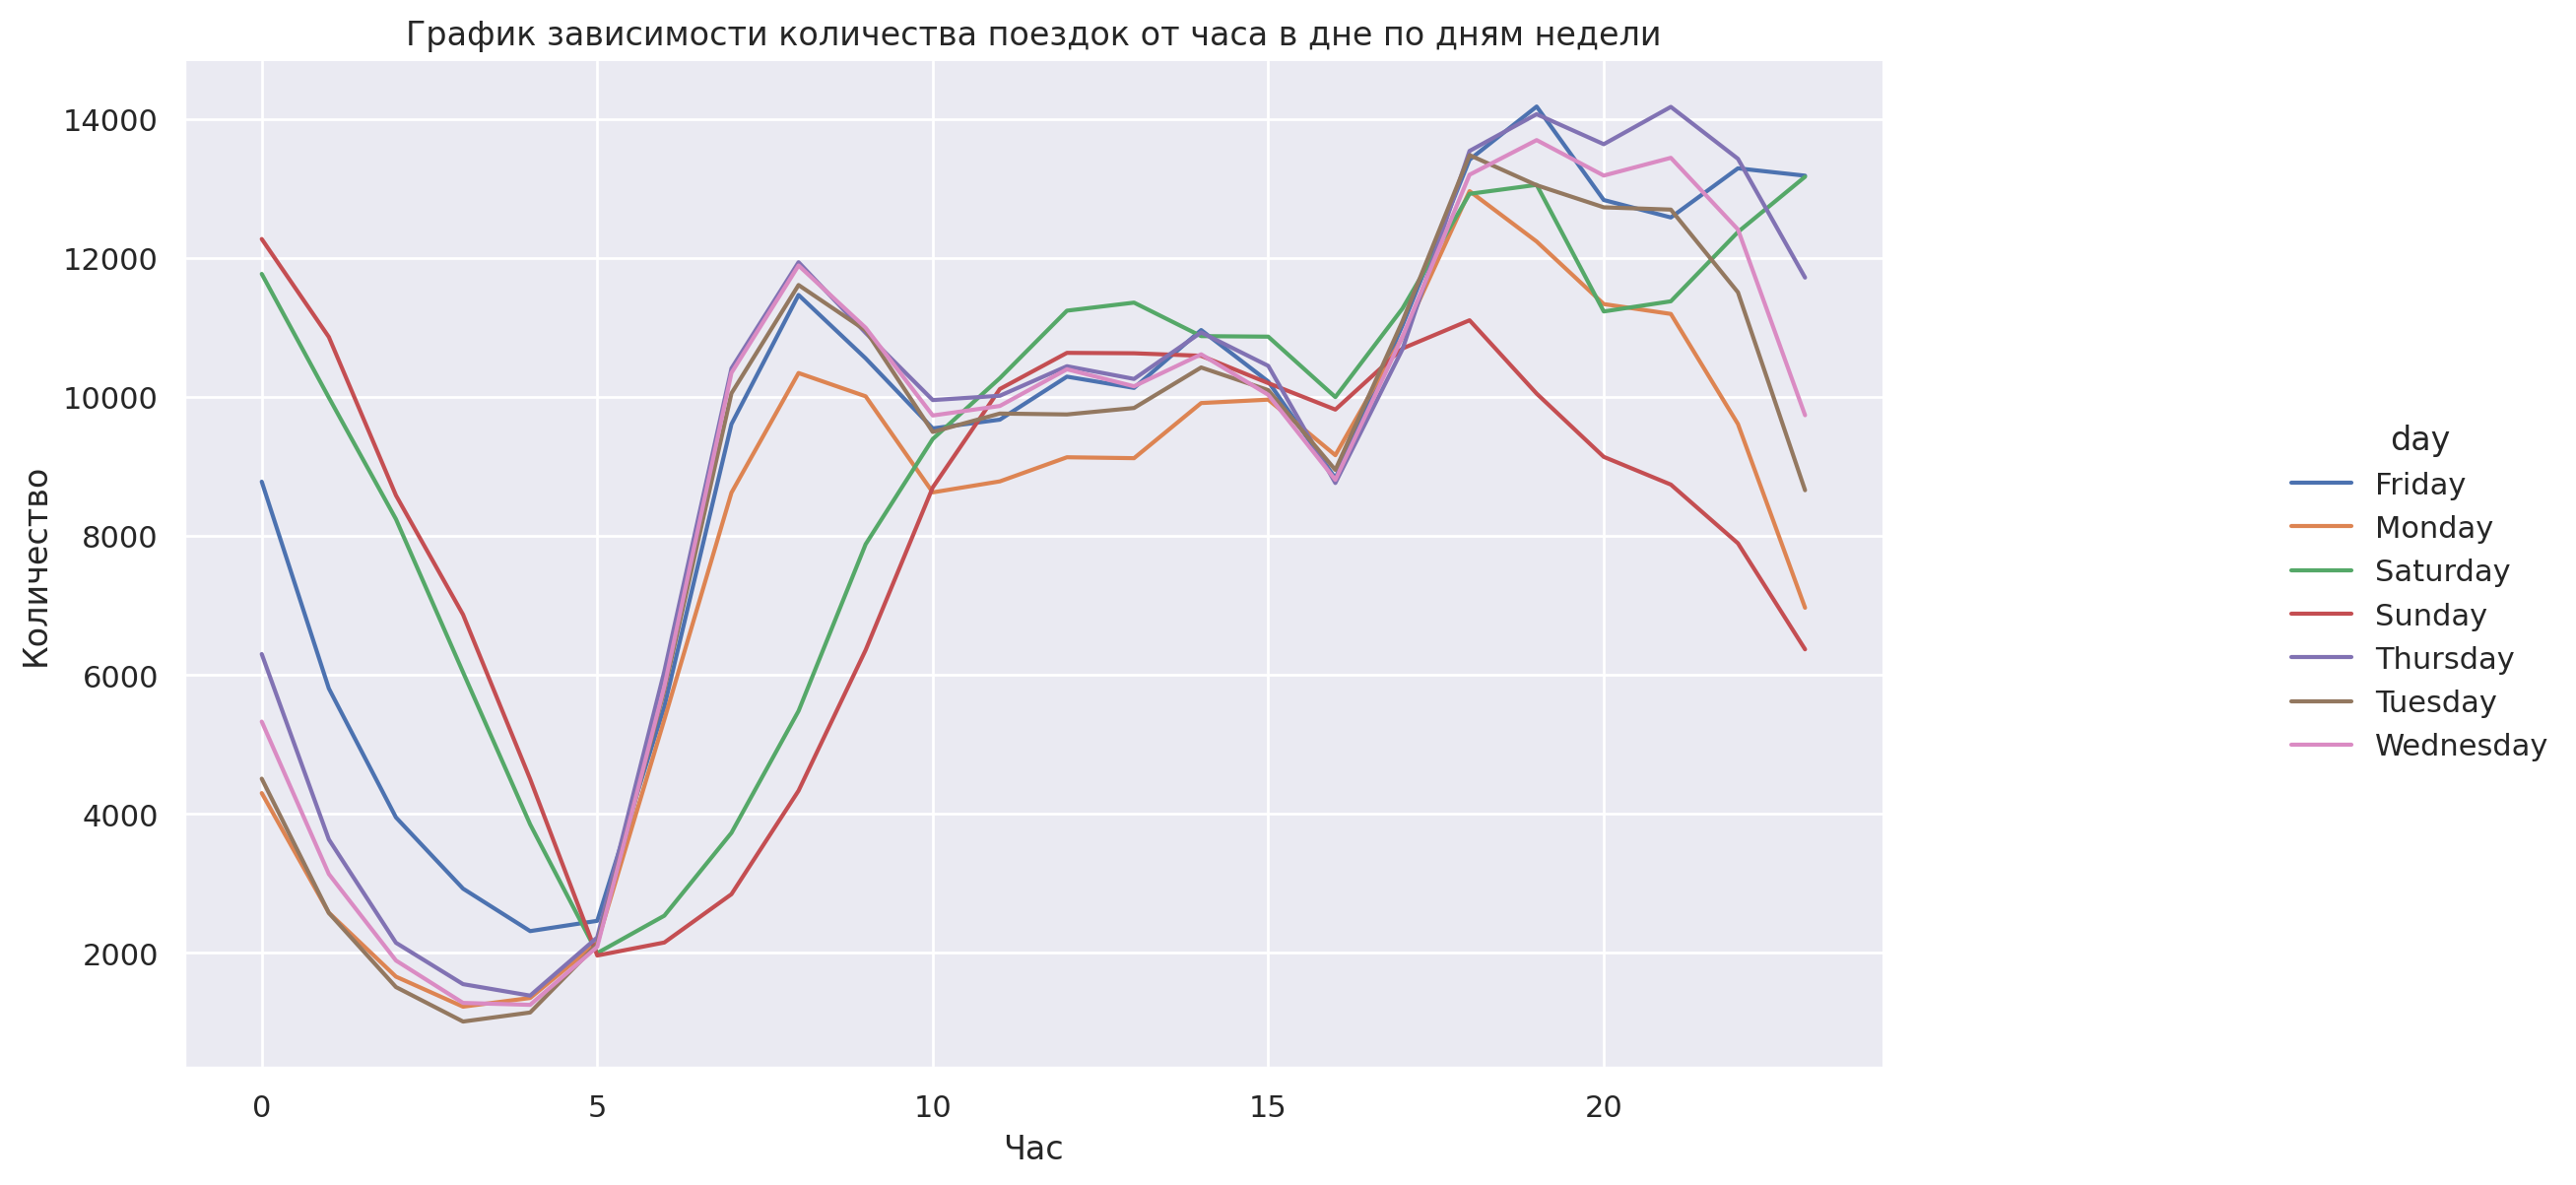

In [106]:
hours = data
hours['hour'], hours['day'] = hours['pickup_datetime'].dt.hour, hours['pickup_datetime'].dt.day_name()
hours = hours.groupby(['day', 'hour'], as_index=False).count()
sns.relplot(hours, x='hour', y='id', hue='day', kind='line').fig.set_size_inches(15, 6)
plt.title('График зависимости количества поездок от часа в дне по дням недели')
plt.xlabel('Час')
plt.ylabel('Количество')
plt.show()

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

Из очевидного можно заметить, что ночью количество поездок резко падает, также в воскресенье поездок вечером заметно меньше чем в остальные  дни и в пятницу и субботу ночью поездок больше всего (подозреваю что всему виной алкоголь и прочее разложение)

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3 (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [107]:
from sklearn.model_selection import train_test_split

y = data["log_trip_duration"]
X = data.drop(columns=["log_trip_duration"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

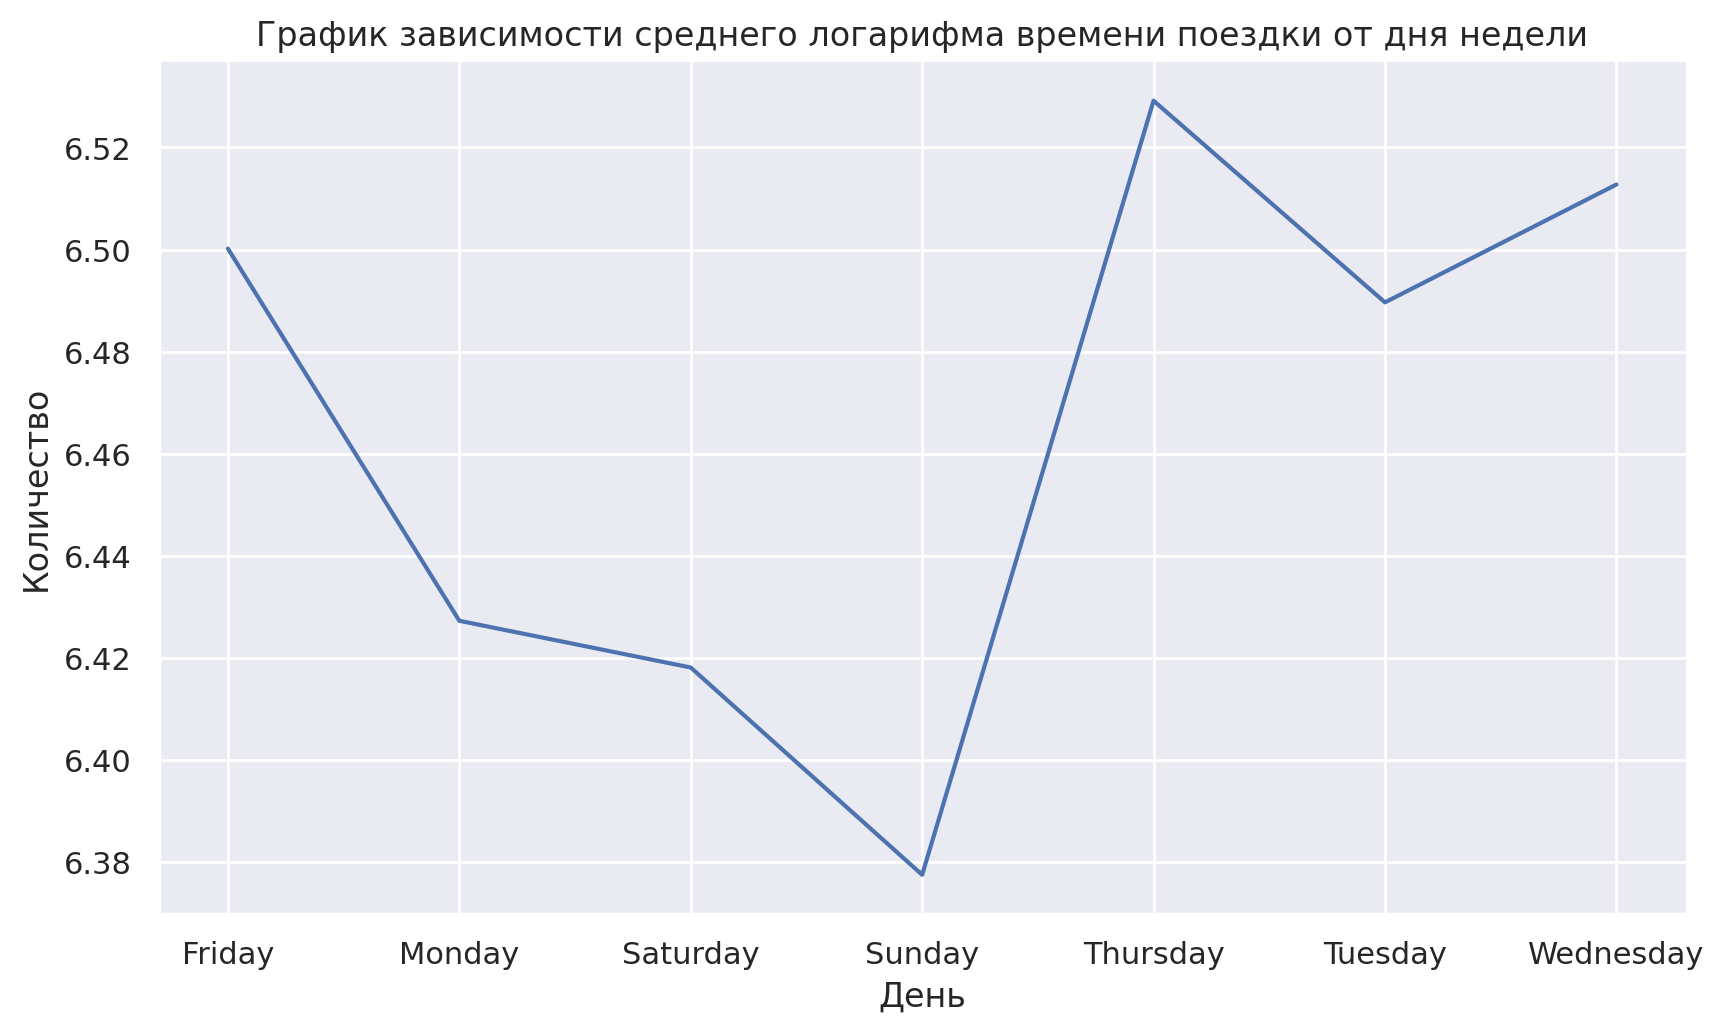

In [108]:
days = y_train.groupby(X_train['pickup_datetime'].dt.day_name()).mean()
sns.relplot(data=days, kind='line').fig.set_size_inches(10, 5)
plt.title('График зависимости среднего логарифма времени поездки от дня недели')
plt.xlabel('День')
plt.ylabel('Количество')
plt.show()

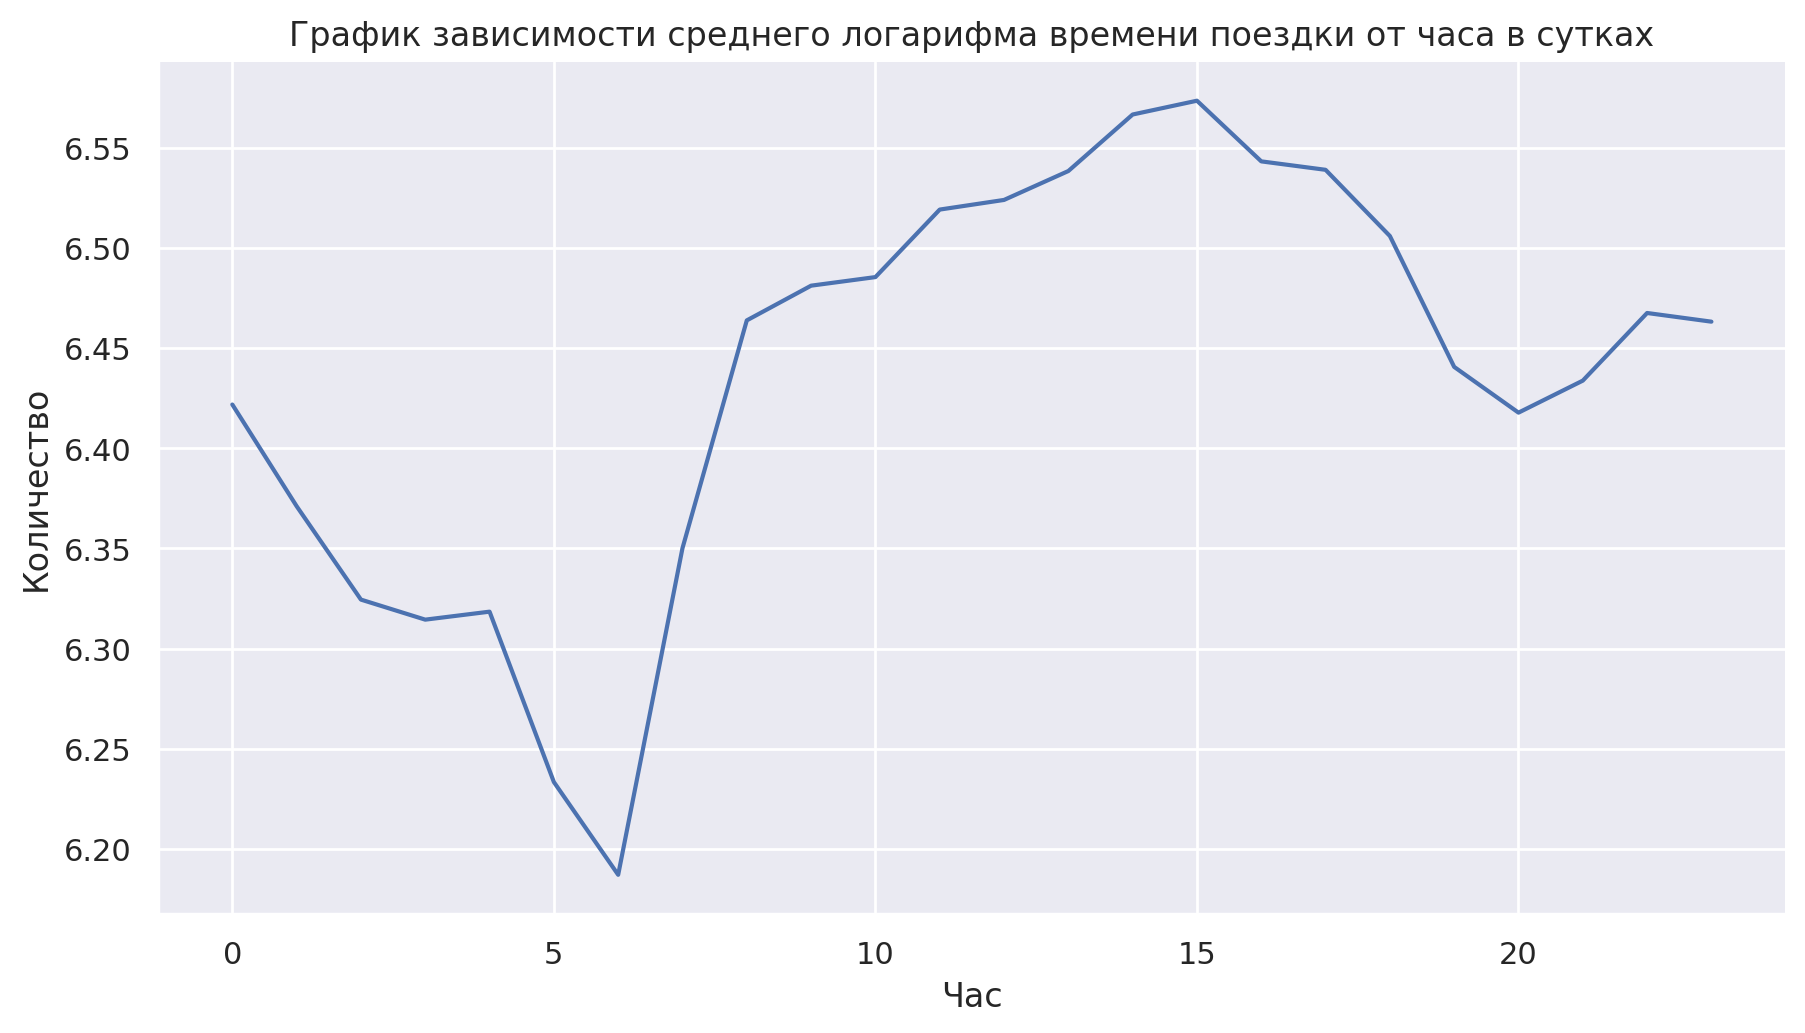

In [109]:
days = y_train.groupby(X_train['pickup_datetime'].dt.hour).mean()
sns.relplot(data=days, kind='line').fig.set_size_inches(10, 5)
plt.title('График зависимости среднего логарифма времени поездки от часа в сутках')
plt.xlabel('Час')
plt.ylabel('Количество')
plt.show()

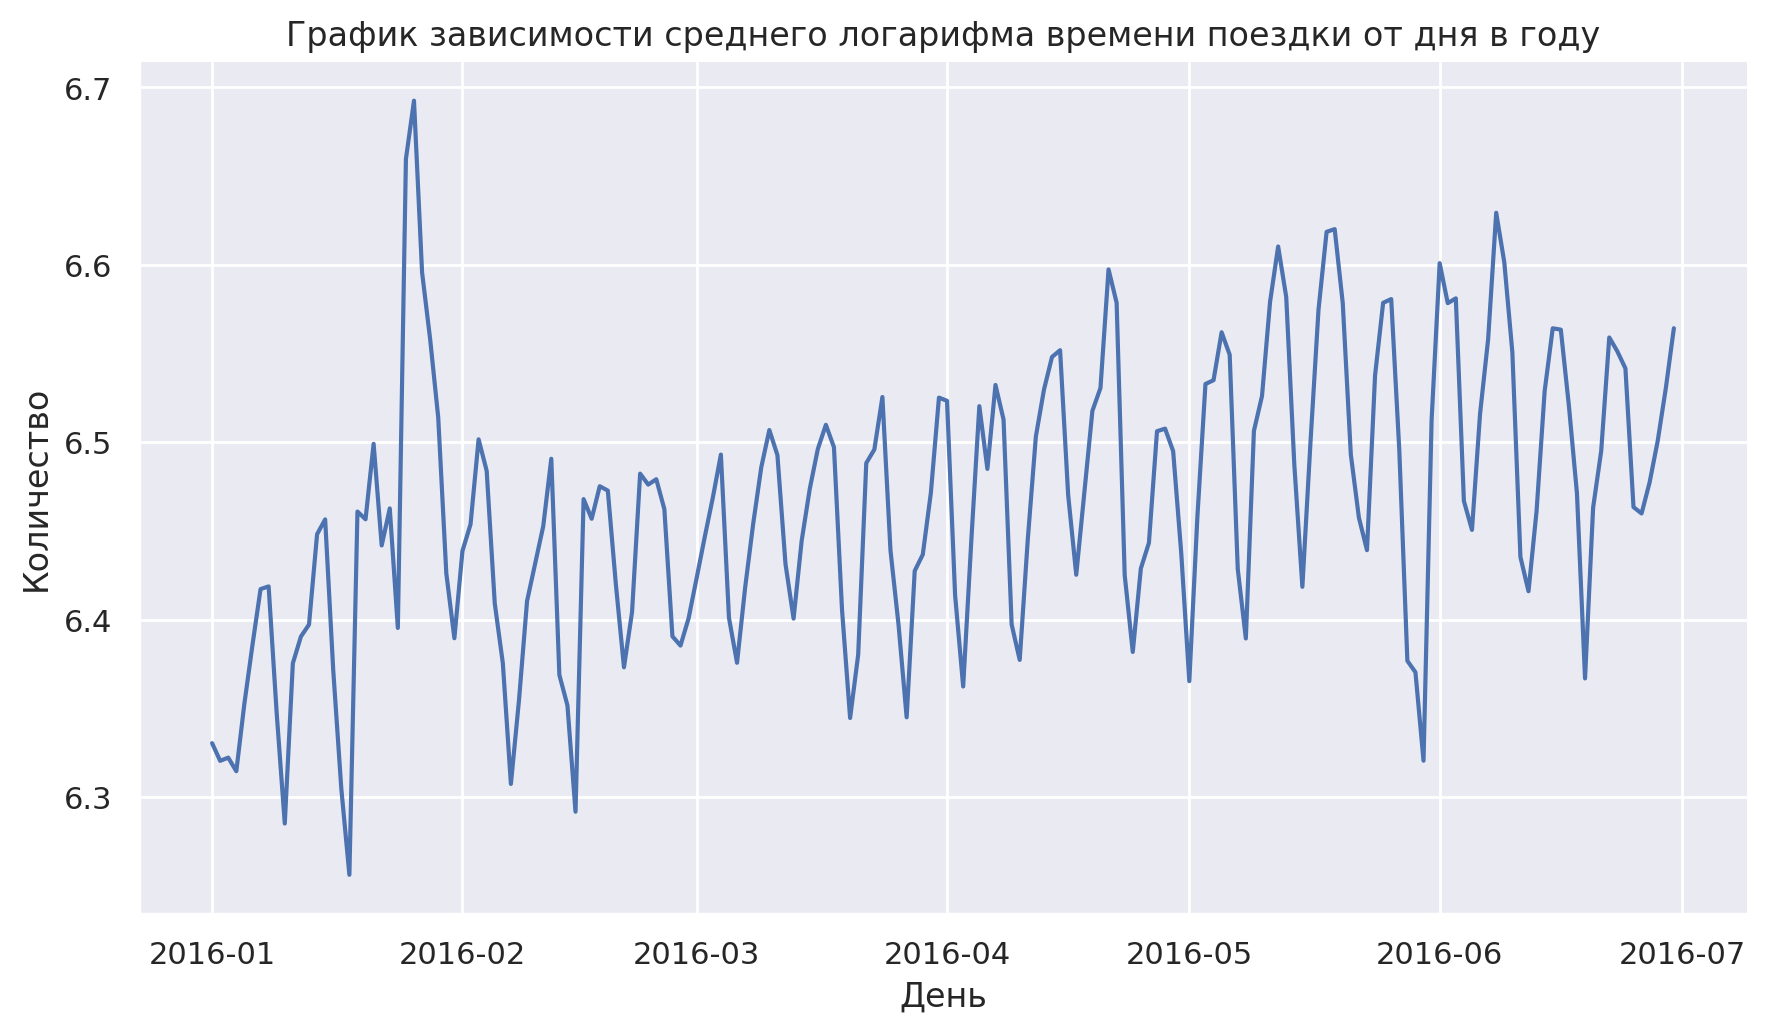

In [110]:
days = y_train.groupby(X_train['pickup_datetime'].dt.date).mean()
sns.relplot(data=days, kind='line').fig.set_size_inches(10, 5)
plt.title('График зависимости среднего логарифма времени поездки от дня в году')
plt.xlabel('День')
plt.ylabel('Количество')
plt.show()

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

1) Графики похожи, потому что чем больше поездок, тем более вероятно, что встретятся большие, которые сильно повлияют на среднее значение
2) В снегопад длительность поездок была аномально высокой, вероятно потому что такси дольше ехали по тем же дорогам из-за проблем на дорогах,
30.05 все наборот, длительность поездок упало, с чем связано не знаю(
3) Насчет тренда он вроде как растет понемножку

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [111]:
if 'hour' in X_train:
    X_train = X_train.drop(columns=['hour'])
if 'month' in X_train:
    X_train = X_train.drop(columns=['month'])
if 'day' in X_train:
    X_train = X_train.drop(columns=['day'])
if 'hour' in X_test:
    X_test = X_test.drop(columns=['hour'])
if 'month' in X_test:
    X_test = X_test.drop(columns=['month'])
if 'day' in X_test:
    X_test = X_test.drop(columns=['day'])
X_train['dayofweek'] = X_train['pickup_datetime'].dt.dayofweek
X_train['month'] = X_train['pickup_datetime'].dt.month
X_train['hour'] = X_train['pickup_datetime'].dt.hour
X_train['dayofyear'] = X_train['pickup_datetime'].dt.dayofyear
X_train['is_abnormality'] = np.where([(X_train['pickup_datetime'].dt.date.astype(str) == '2016-01-23') |
                                     (X_train['pickup_datetime'].dt.date.astype(str) == '2016-01-24') |
                                     (X_train['pickup_datetime'].dt.date.astype(str) == '2016-05-30')][0], True, False)
X_test['dayofweek'] = X_test['pickup_datetime'].dt.dayofweek
X_test['month'] = X_test['pickup_datetime'].dt.month
X_test['hour'] = X_test['pickup_datetime'].dt.hour
X_test['dayofyear'] = X_test['pickup_datetime'].dt.dayofyear
X_test['is_abnormality'] = np.where([(X_test['pickup_datetime'].dt.date.astype(str) == '2016-01-23') |
                                     (X_test['pickup_datetime'].dt.date.astype(str) == '2016-01-24') |
                                     (X_test['pickup_datetime'].dt.date.astype(str) == '2016-05-30')][0], True, False)

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

День недели категориальный, потому что имеет смысл не числа а категории блинб, по тому что четверг четвертый ничего не сказать про пятый день или восьмой, короче понятно


Месяц числовой, потому что с увеличением месяца среднее значение целевой переменной по чуть-чуть растет

Час тоже категориальный, смысл как с днем недели


Аномальность категориальный понятно, бинарный признак


День в году числовой как и месяц по этому же


**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [112]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

categorical = ['dayofweek', 'hour', 'is_abnormality']

numeric_features = ['month', 'dayofyear']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.7876


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [113]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    
    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [24]:
show_circles_on_map(data.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [25]:
show_circles_on_map(data.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?

Выделяются аэропорты

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [114]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

data['haversine'] = haversine_array(data['pickup_latitude'], data['pickup_longitude'], data['dropoff_latitude'], data['dropoff_longitude'])


Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [115]:
data['log_haversine'] = np.log1p(data['haversine'])

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [116]:
your_df = data
assert your_df['log_haversine'].corr(your_df['log_trip_duration']) > your_df['haversine'].corr(your_df['log_trip_duration'])

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

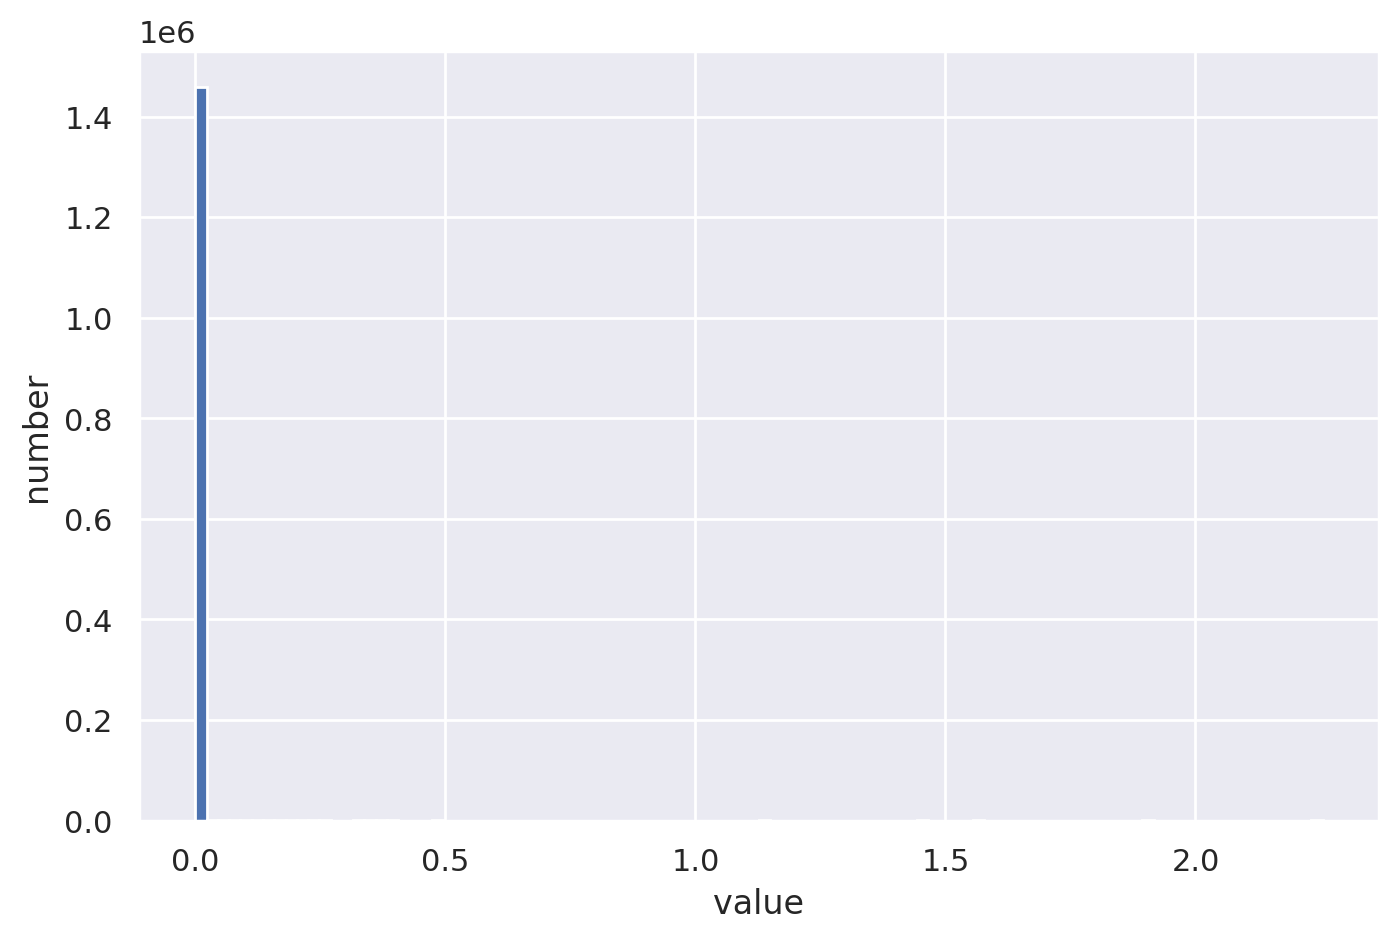

In [117]:
data["speed"] = data["haversine"] / (np.e ** data["log_trip_duration"])
plt.hist(data['speed'], bins=100)
plt.xlabel('value')
plt.ylabel('number')
plt.show()


Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

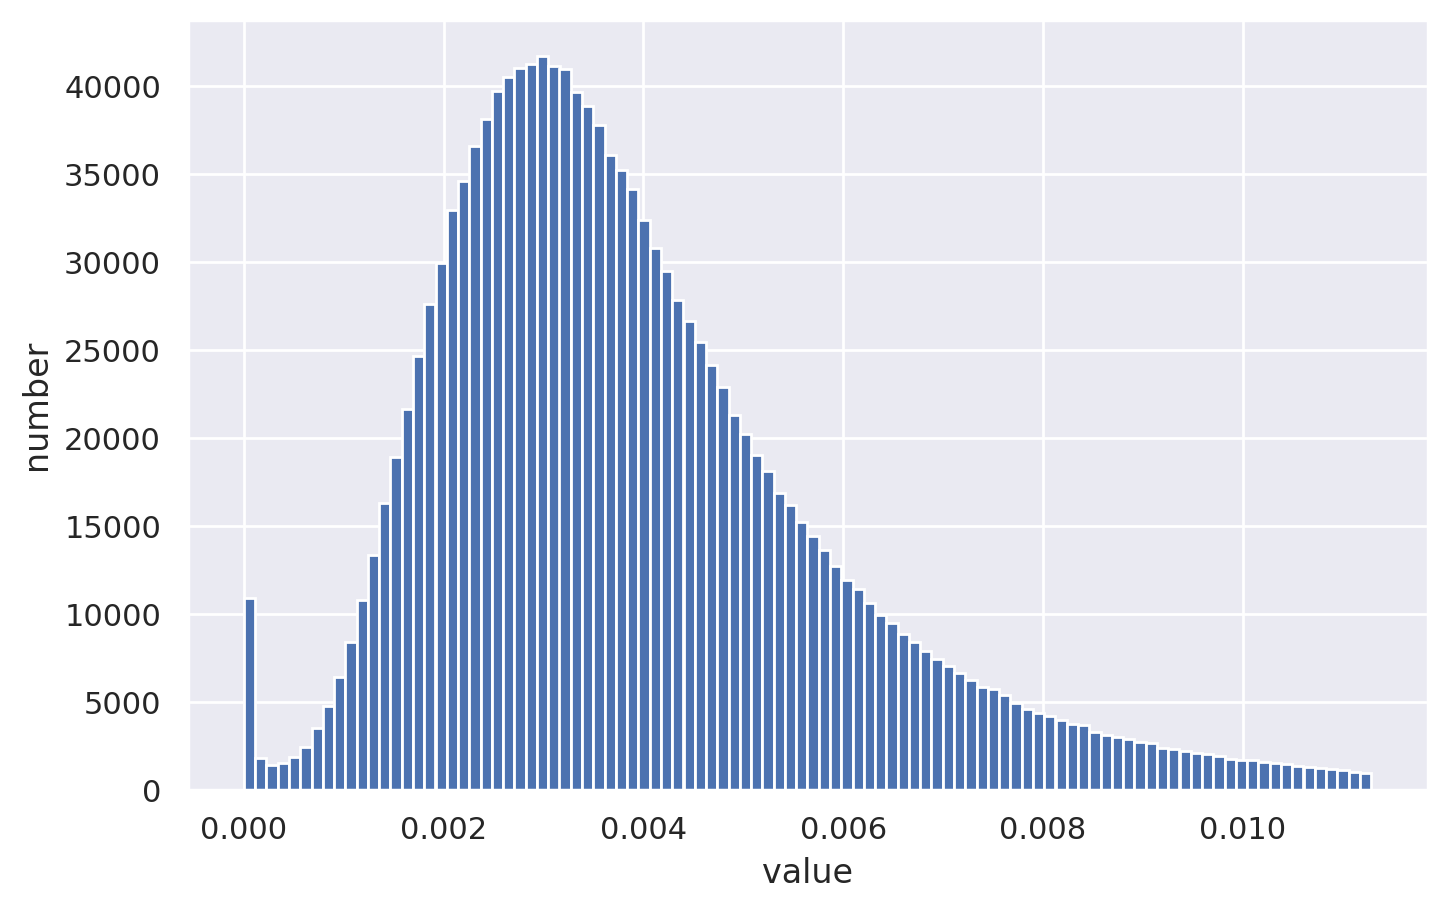

In [118]:
plt.hist(data[data.speed < data.speed.quantile(.99)]['speed'], bins=100)
plt.xlabel('value')
plt.ylabel('number')
plt.show()

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

<Axes: xlabel='day', ylabel='hour'>

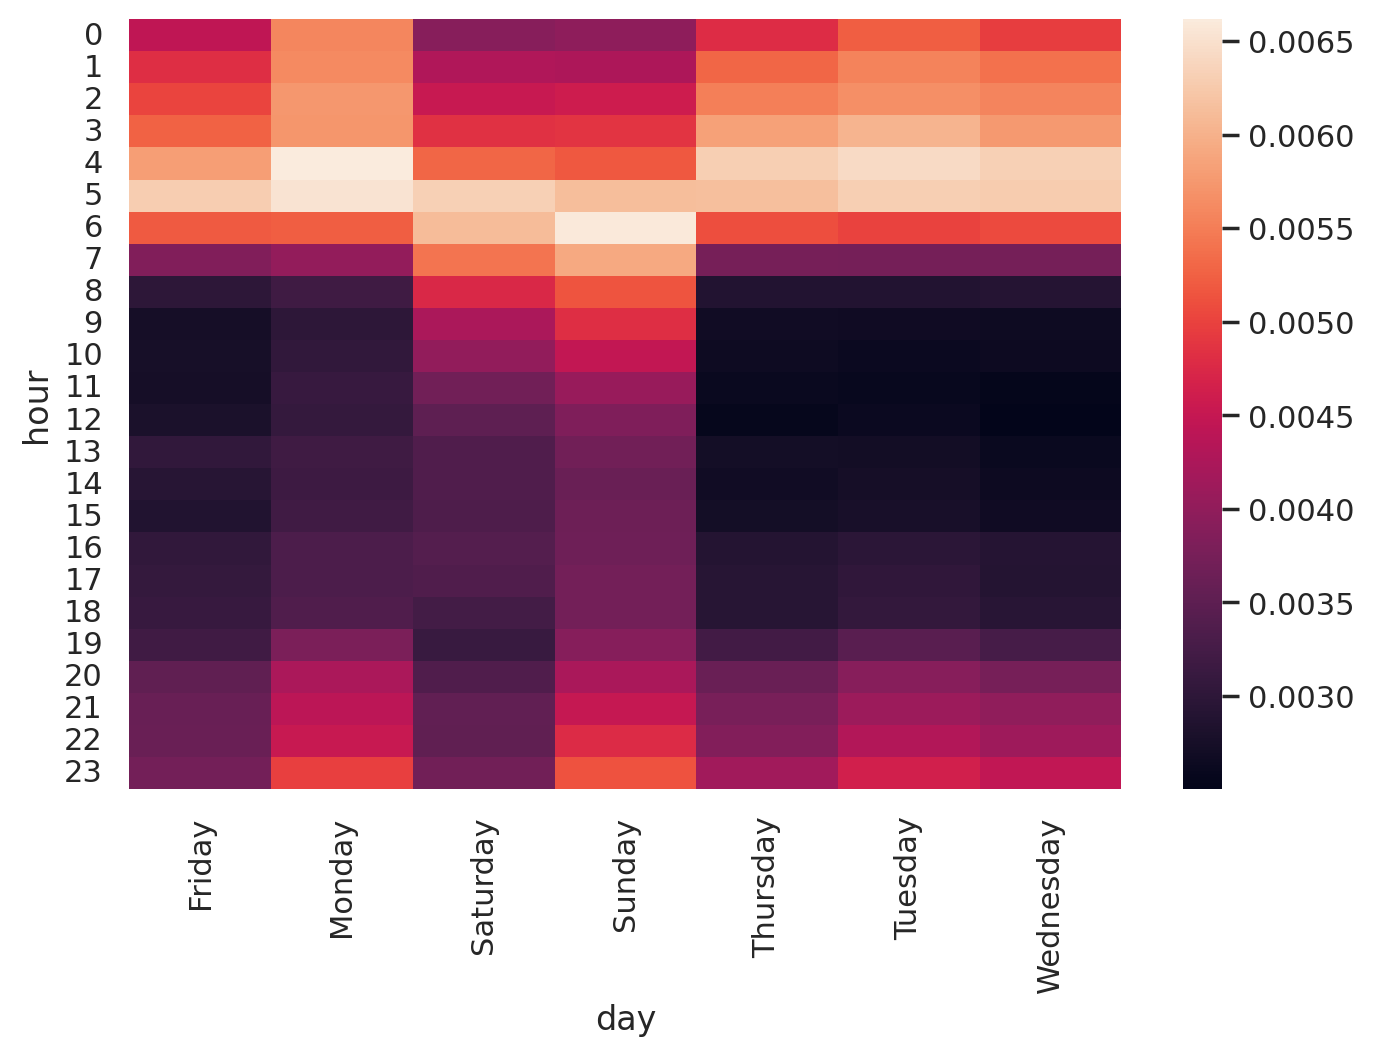

In [119]:
tmp = data
tmp = tmp[['day', 'hour', 'speed']].groupby(['day', 'hour'], as_index=False).median()

tmp = tmp.pivot(index="hour", columns="day", values="speed")
sns.heatmap(tmp)


Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

In [120]:
del data['speed']

Потому что чтобы посчитать скорость мы использовали целевую переменную которую обычно не знаем

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [121]:
data['jam'] = np.where([(((data['pickup_datetime'].dt.dayofweek == 0) & (data['pickup_datetime'].dt.hour >= 8) & (data['pickup_datetime'].dt.hour <= 18)) |
                       ((data['pickup_datetime'].dt.dayofweek == 1) & (data['pickup_datetime'].dt.hour >= 8) & (data['pickup_datetime'].dt.hour <= 18)) |
                       ((data['pickup_datetime'].dt.dayofweek == 2) & (data['pickup_datetime'].dt.hour >= 8) & (data['pickup_datetime'].dt.hour <= 19)) |
                       ((data['pickup_datetime'].dt.dayofweek == 3) & (data['pickup_datetime'].dt.hour >= 8) & (data['pickup_datetime'].dt.hour <= 19)) |
                       ((data['pickup_datetime'].dt.dayofweek == 4) & (data['pickup_datetime'].dt.hour >= 8) & (data['pickup_datetime'].dt.hour <= 19)) |
                       ((data['pickup_datetime'].dt.dayofweek == 5) & (data['pickup_datetime'].dt.hour >= 18) & (data['pickup_datetime'].dt.hour <= 20)))][0], True, False)
data['free'] = np.where([(((data['pickup_datetime'].dt.dayofweek == 0) & (data['pickup_datetime'].dt.hour >= 0) & (data['pickup_datetime'].dt.hour <= 5)) |
                       ((data['pickup_datetime'].dt.dayofweek == 1) & (data['pickup_datetime'].dt.hour >= 0) & (data['pickup_datetime'].dt.hour <= 5)) |
                       ((data['pickup_datetime'].dt.dayofweek == 2) & (data['pickup_datetime'].dt.hour >= 1) & (data['pickup_datetime'].dt.hour <= 5)) |
                       ((data['pickup_datetime'].dt.dayofweek == 3) & (data['pickup_datetime'].dt.hour >= 1) & (data['pickup_datetime'].dt.hour <= 5)) |
                       ((data['pickup_datetime'].dt.dayofweek == 4) & (data['pickup_datetime'].dt.hour >= 4) & (data['pickup_datetime'].dt.hour <= 5)) |
                       ((data['pickup_datetime'].dt.dayofweek == 5) & (data['pickup_datetime'].dt.hour >= 5) & (data['pickup_datetime'].dt.hour <= 7)) |
                       ((data['pickup_datetime'].dt.dayofweek == 6) & (data['pickup_datetime'].dt.hour >= 5) & (data['pickup_datetime'].dt.hour <= 7)))][0], True, False)
data

id  vendor_id     pickup_datetime  passenger_count  \
0        id2875421          2 2016-03-14 17:24:55                1   
1        id2377394          1 2016-06-12 00:43:35                1   
2        id3858529          2 2016-01-19 11:35:24                1   
3        id3504673          2 2016-04-06 19:32:31                1   
4        id2181028          2 2016-03-26 13:30:55                1   
...            ...        ...                 ...              ...   
1458639  id2376096          2 2016-04-08 13:31:04                4   
1458640  id1049543          1 2016-01-10 07:35:15                1   
1458641  id2304944          2 2016-04-22 06:57:41                1   
1458642  id2714485          1 2016-01-05 15:56:26                1   
1458643  id1209952          1 2016-04-05 14:44:25                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
0              -73.982155        40.767937         -73.964630   
1              -73.980415        40.738564         -73.999481   
2              -73.979027        40.763939         -74.005333   
3              -74.010040        40.719971         -74.012268   
4              -73.973053        40.793209         -73.972923   
...                   ...              ...                ...   
1458639        -73.982201        40.745522         -73.994911   
1458640        -74.000946        40.747379         -73.970184   
1458641        -73.959129        40.768799         -74.004433   
1458642        -73.982079        40.749062         -73.974632   
1458643        -73.979538        40.781750         -73.972809   

         dropoff_latitude store_and_fwd_flag  log_trip_duration  hour  month  \
0               40.765602                  N           6.122493    17      3   
1               40.731152                  N           6.498282     0      6   
2               40.710087                  N           7.661527    11      1   
3               40.706718                  N           6.063785    19      4   
4               40.782520                  N           6.077642    13      3   
...                   ...                ...                ...   ...    ...   
1458639         40.740170                  N           6.658011    13      4   
1458640         40.796547                  N           6.486161     7      1   
1458641         40.707371                  N           6.639876     6      4   
1458642         40.757107                  N           5.924256    15      1   
1458643         40.790585                  N           5.293305    14      4   

               day  haversine  log_haversine    jam   free  
0           Monday   1.498521       0.915699   True  False  
1           Sunday   1.805507       1.031584  False  False  
2          Tuesday   6.385098       1.999464   True  False  
3        Wednesday   1.485498       0.910473   True  False  
4         Saturday   1.188588       0.783257  False  False  
...            ...        ...            ...    ...    ...  
1458639     Friday   1.225080       0.799793   True  False  
1458640     Sunday   6.049836       1.953004  False   True  
1458641     Friday   7.824606       2.177544  False  False  
1458642    Tuesday   1.092564       0.738390   True  False  
1458643    Tuesday   1.134042       0.758018   True  False  

[1458644 rows x 17 columns]

**Задание 8 (0.25 балла)**. Для каждого из замеченных вами выше 2-3 пунктов добавьте в выборку по два признака: 
- началась ли поездка в этом пункте
- закончилась ли поездка в этом пункте

Как вы думаете, почему эти признаки могут быть полезны?

In [122]:
# 40.627353 -73.817833; 40.662630 -73.753437
# 40.768117 -73.887930; 40.785016 -73.851679

data['start_place1'], data['finish_place1'], data['start_place2'], data['finish_place2'] = False, False, False, False
data['start_place1'] = np.where([((data['pickup_longitude'] >= -73.817833) & (data['pickup_longitude'] <= -73.753437) & 
                                ((data['pickup_latitude'] >= 40.627353) & (data['pickup_latitude'] <= 40.662630)))][0], True, False)
data['finish_place1'] = np.where([((data['dropoff_longitude'] >= -73.817833) & (data['dropoff_longitude'] <= -73.753437) & 
                                ((data['dropoff_latitude'] >= 40.627353) & (data['dropoff_latitude'] <= 40.662630)))][0], True, False)


data['start_place2'] = np.where([((data['pickup_longitude'] >= -73.887930) & (data['pickup_longitude'] <= -73.851679) & 
                                ((data['pickup_latitude'] >= 40.768117) & (data['pickup_latitude'] <= 40.785016)))][0], True, False)
data['finish_place2'] = np.where([((data['dropoff_longitude'] >= -73.887930) & (data['dropoff_longitude'] <= -73.851679) & 
                                ((data['dropoff_latitude'] >= 40.768117) & (data['dropoff_latitude'] <= 40.785016)))][0], True, False)
show_circles_on_map(data[data['finish_place2']].sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

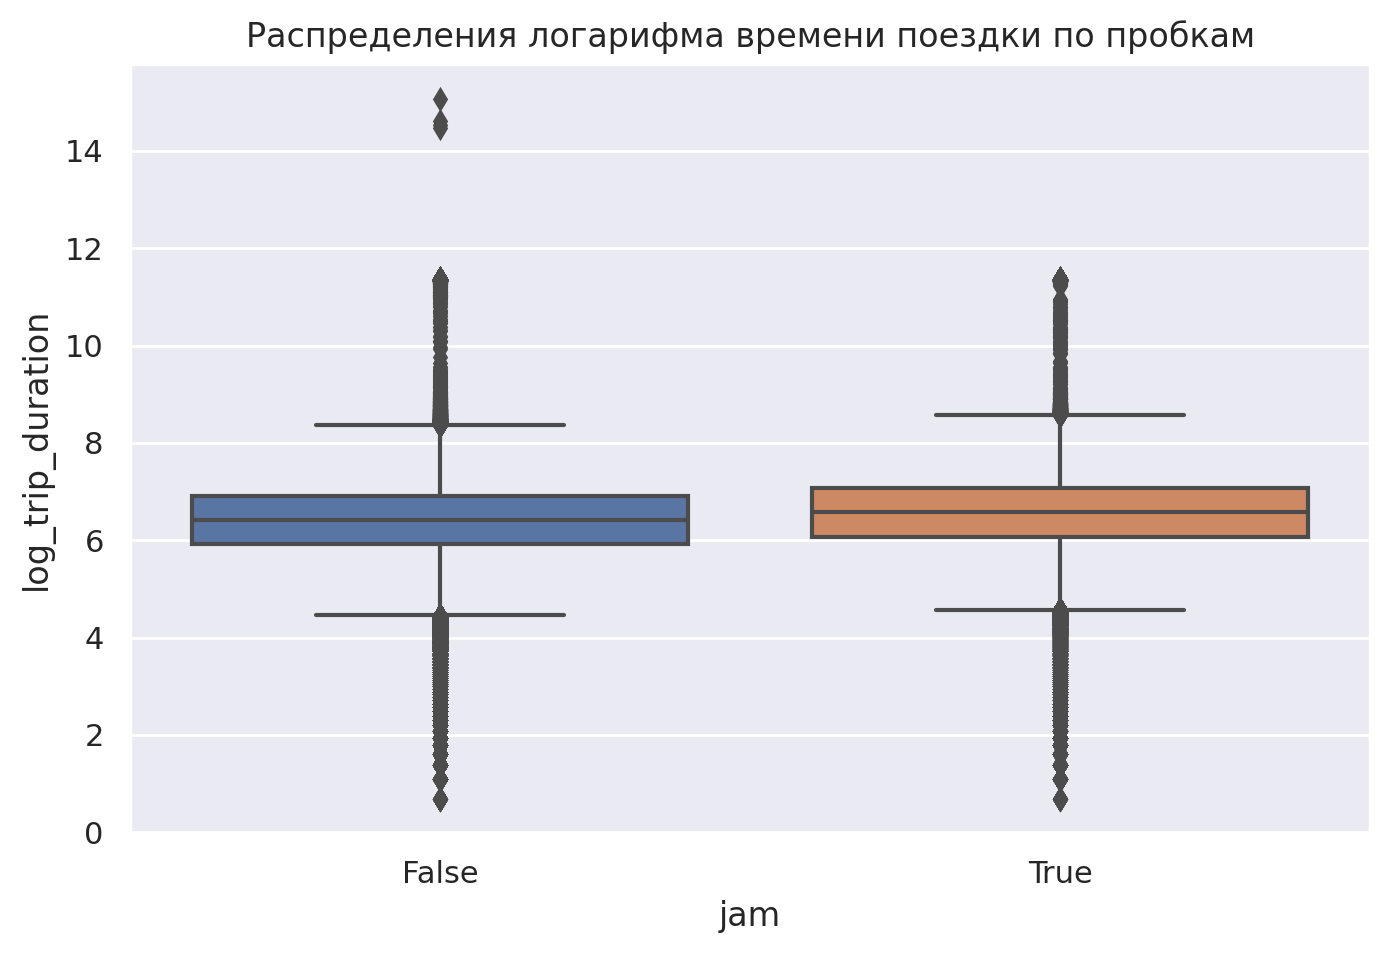

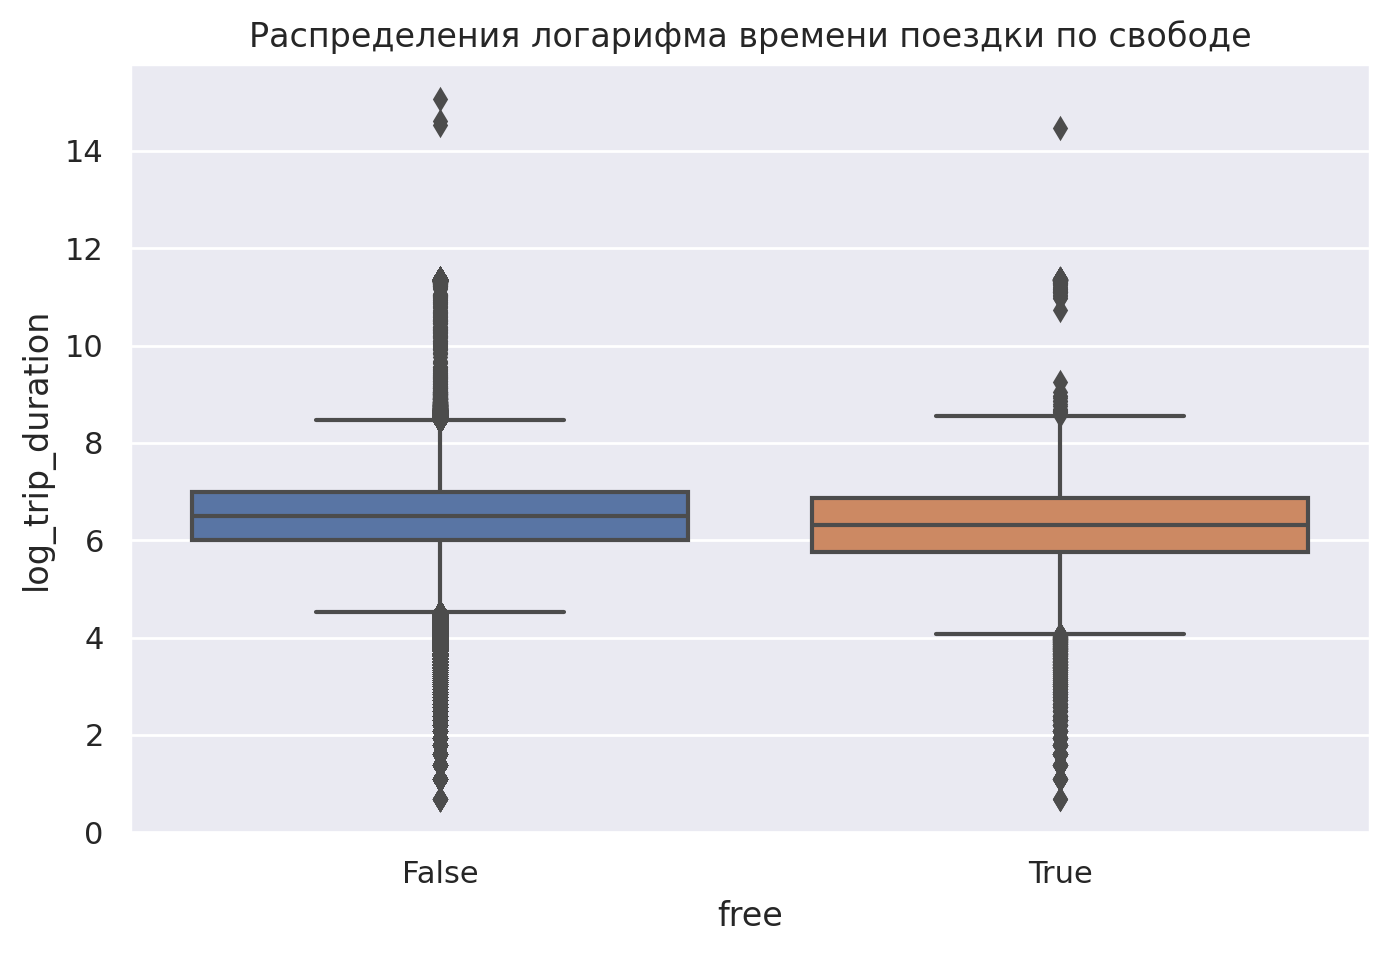

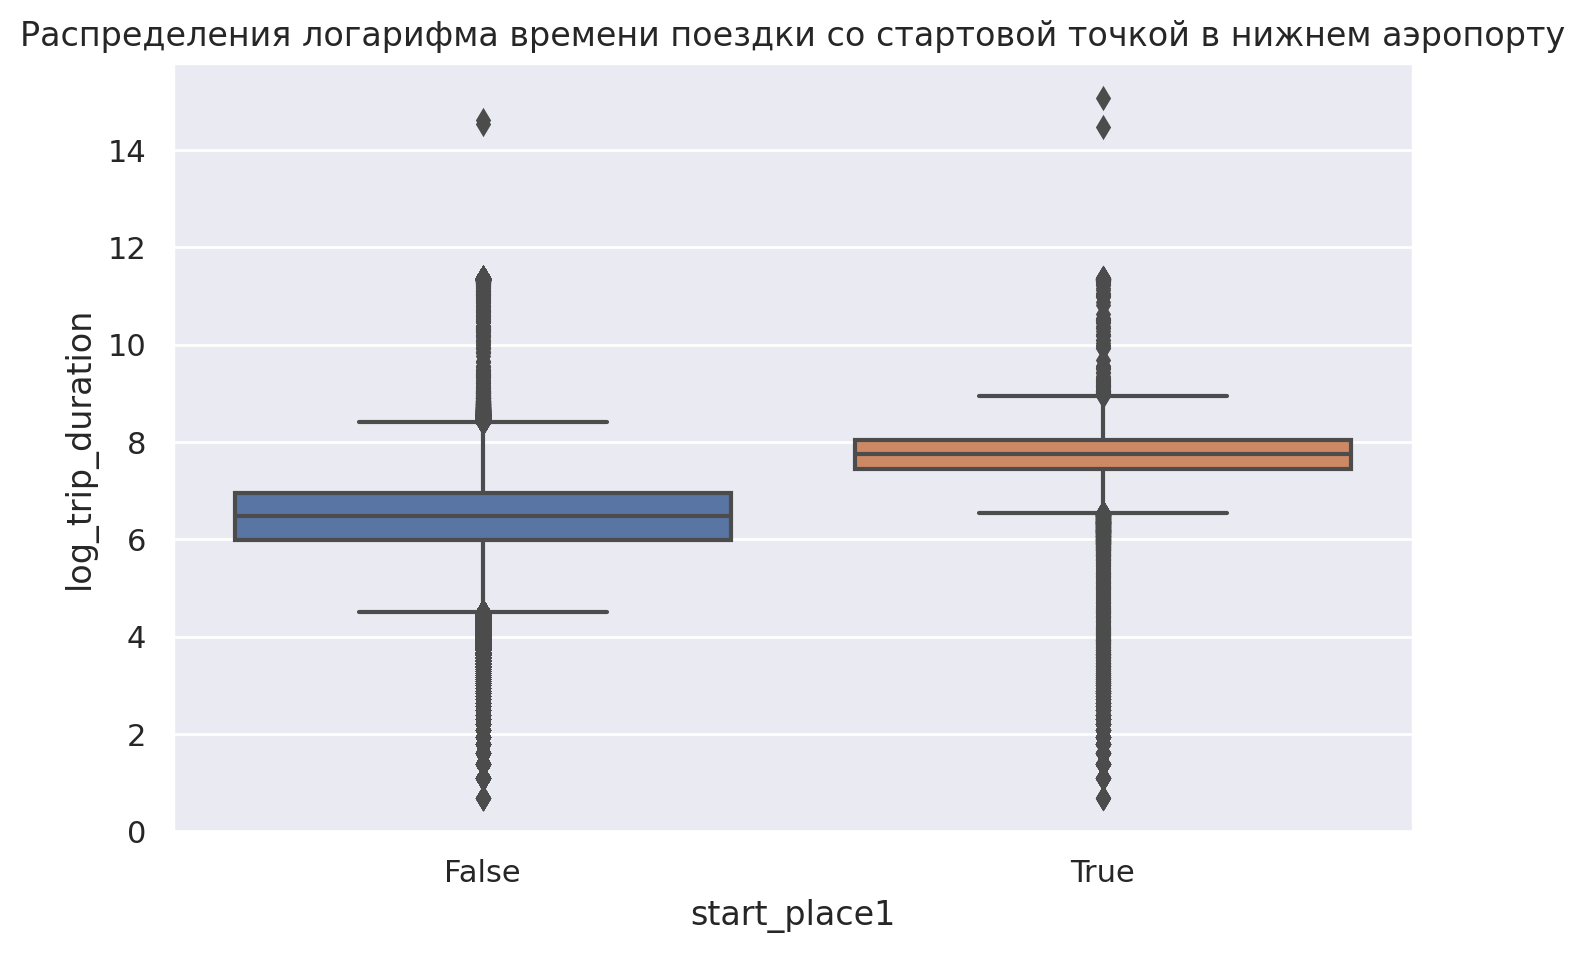

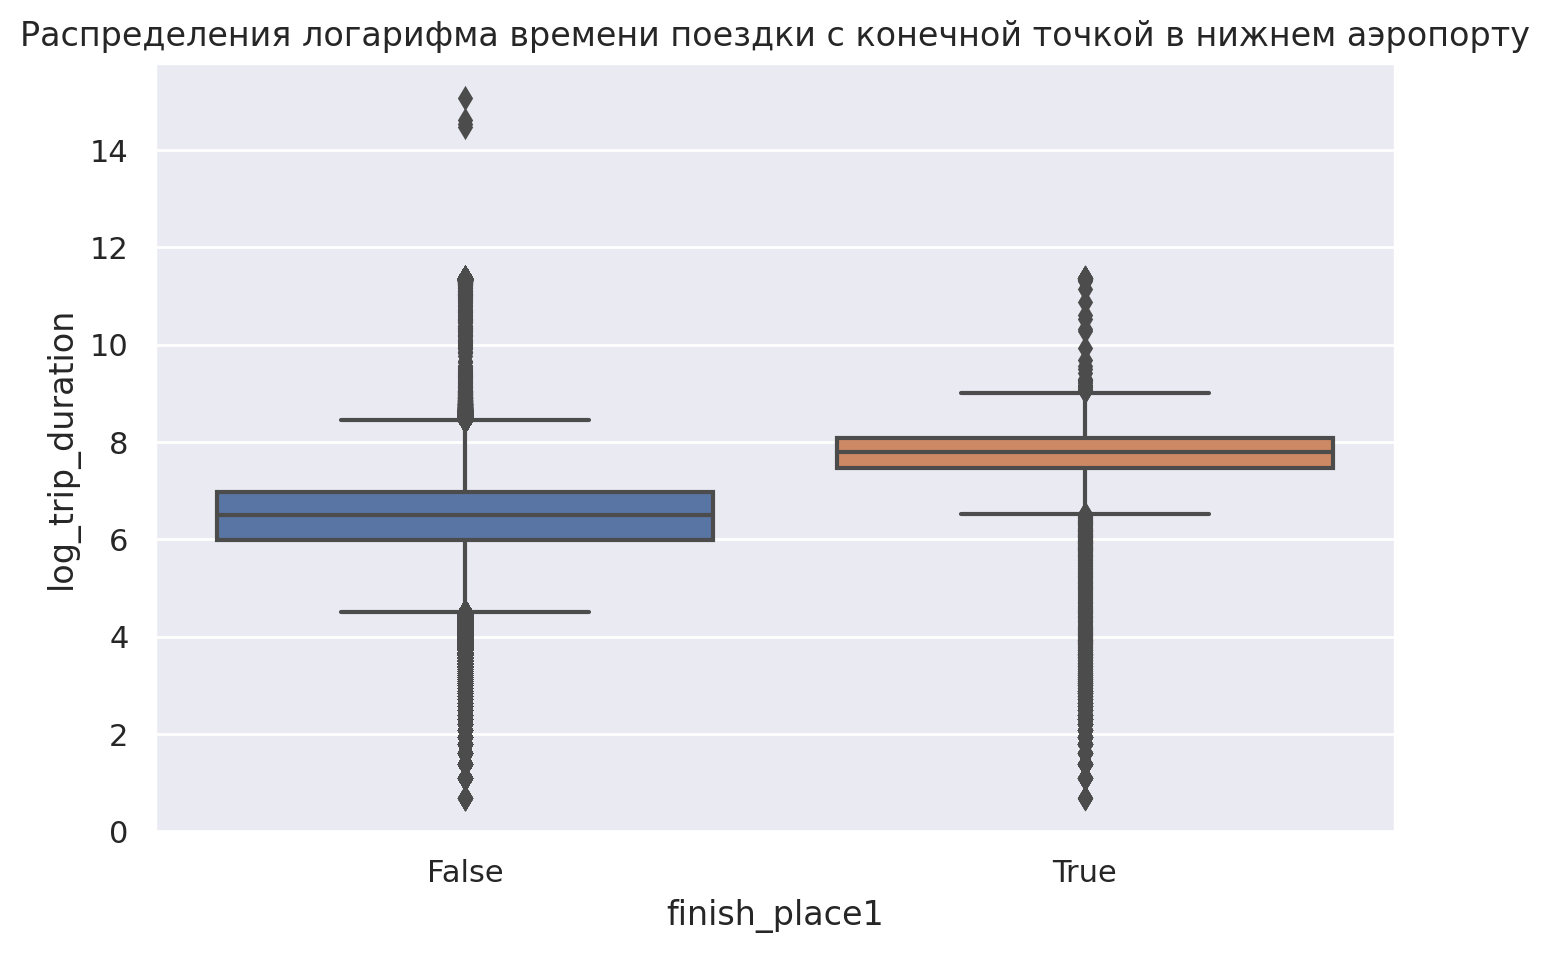

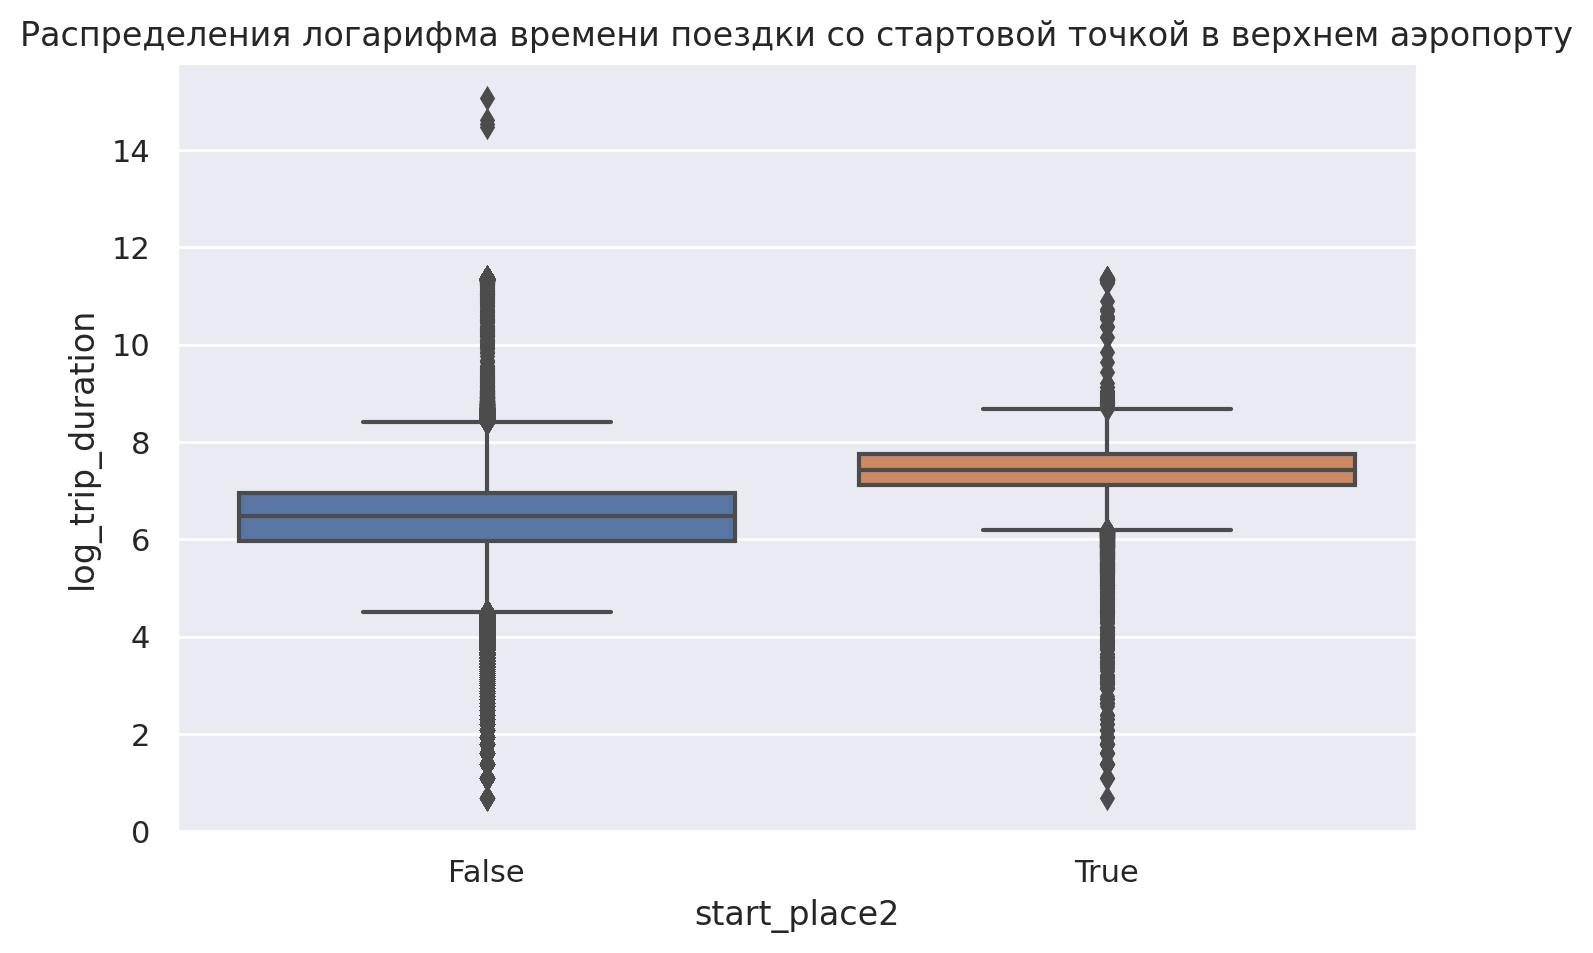

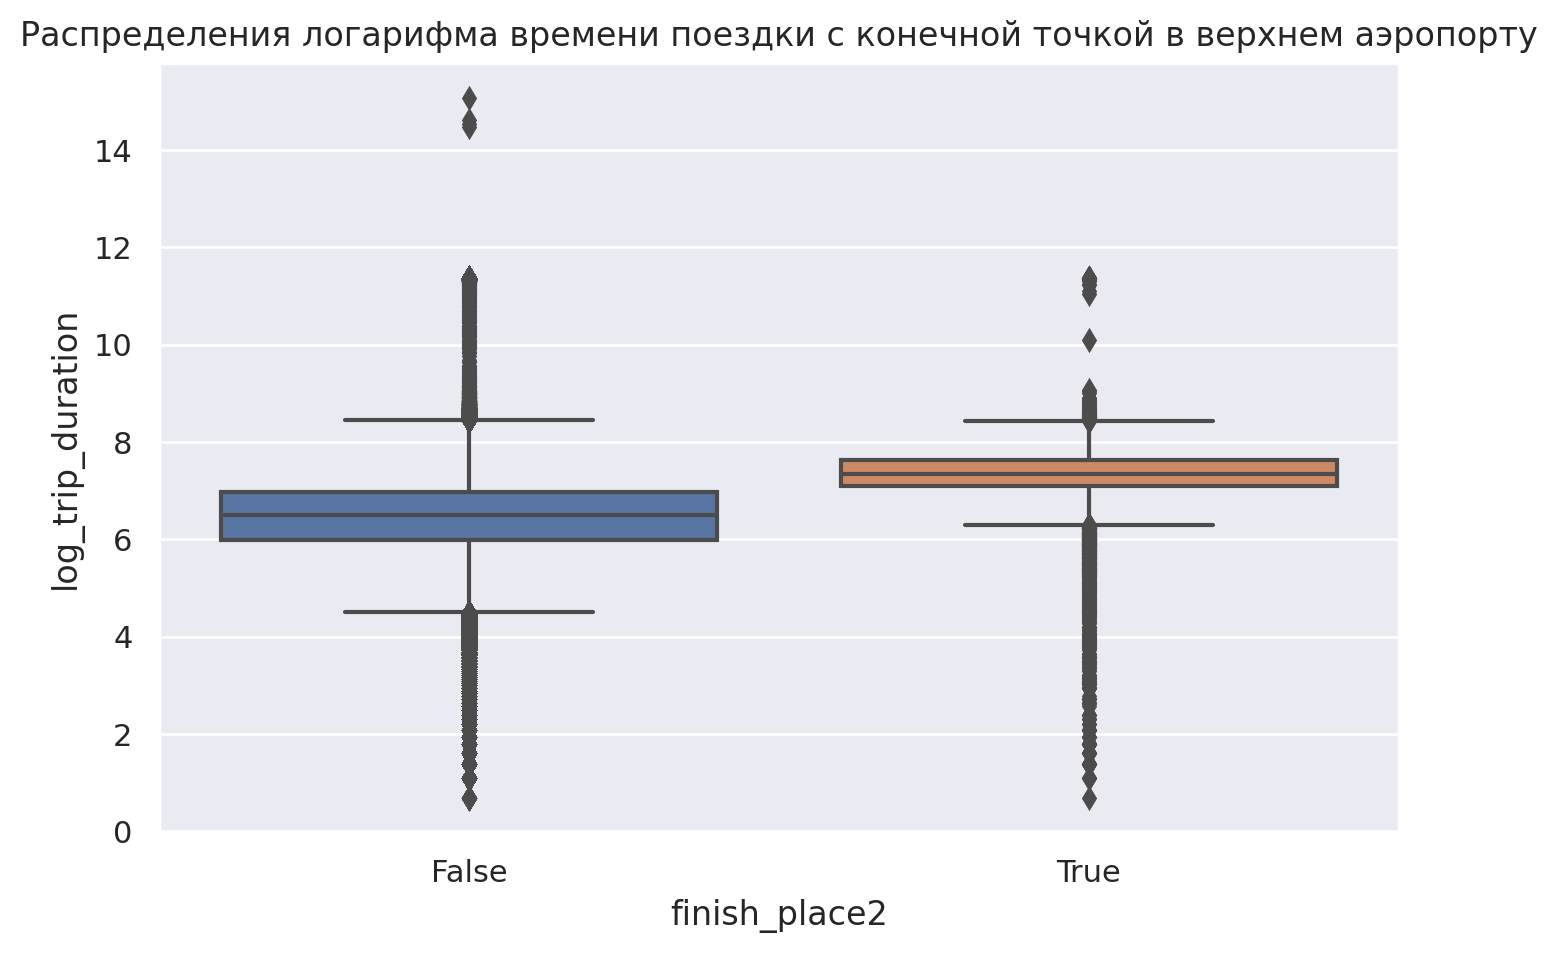

In [123]:
sns.boxplot(data=data, x='jam', y='log_trip_duration')
plt.title('Распределения логарифма времени поездки по пробкам')
plt.show()
sns.boxplot(data=data, x='free', y='log_trip_duration')
plt.title('Распределения логарифма времени поездки по свободе')
plt.show()
sns.boxplot(data=data, x='start_place1', y='log_trip_duration')
plt.title('Распределения логарифма времени поездки со стартовой точкой в нижнем аэропорту')
plt.show()
sns.boxplot(data=data, x='finish_place1', y='log_trip_duration')
plt.title('Распределения логарифма времени поездки с конечной точкой в нижнем аэропорту')
plt.show()
sns.boxplot(data=data, x='start_place2', y='log_trip_duration')
plt.title('Распределения логарифма времени поездки со стартовой точкой в верхнем аэропорту')
plt.show()
sns.boxplot(data=data, x='finish_place2', y='log_trip_duration')
plt.title('Распределения логарифма времени поездки с конечной точкой в верхнем аэропорту')
plt.show()

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

Да, время действительно заметно меняется при наличии этих признаков

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [124]:
from sklearn.base import BaseEstimator, TransformerMixin


# TransformerMixin implements fit_transform for you,
# applying your fit and transform consistently
    
class MapGridTransformer(BaseEstimator, TransformerMixin):
    number = 7
    def __init__(self):
        self.min_latitude, self.max_latitude, self.min_longitude, self.max_longitude =  40.702724, 40.798956, -74.051596, -73.925856
        self.step_latitude = (self.max_latitude - self.min_latitude) / self.number
        self.step_longitude = (self.max_longitude - self.min_longitude) / self.number
        
    
    def show_map(self):
        mapObj = folium.Map(location=(self.min_latitude, self.min_longitude), zoom_start=11)
        for step1 in range(self.number - 1):
            for step2 in range(self.number - 1):
                folium.Rectangle([(self.min_latitude + step1 * self.step_latitude, self.min_longitude + step1 * self.step_longitude),
                                  (self.min_latitude + (step2 + 1) * self.step_latitude, self.min_longitude + (step2 + 1) * self.step_longitude)]
                                ,color="orange").add_to(mapObj)
        return mapObj
    
    def fit(self, X=None, y=None):
        df = pd.DataFrame()
        values = [i for i in range(-1, self.number**2)]
        df['start'] = values
        df['finish'] = values
        self.ohe = OneHotEncoder(handle_unknown="ignore").fit(df)
        return self

    def transform(self, X, y=None):
        tmp = X.copy()
        tmp['start'] = np.where([((tmp['pickup_longitude'] >= self.min_longitude) & (tmp['pickup_longitude'] <= self.max_longitude) &
                                 (tmp['pickup_latitude'] >= self.min_latitude) & (tmp['pickup_latitude'] <= self.max_latitude))][0],
                                ((tmp['pickup_latitude'] - self.min_latitude) // self.step_latitude) * self.number +
                                (tmp['pickup_longitude'] - self.min_longitude) // self.step_longitude
                                , -1)
        tmp['finish'] = np.where([((tmp['dropoff_longitude'] >= self.min_longitude) & (tmp['dropoff_longitude'] <= self.max_longitude) &
                                 (tmp['dropoff_latitude'] >= self.min_latitude) & (tmp['dropoff_latitude'] <= self.max_latitude))][0],
                                ((tmp['dropoff_latitude'] - self.min_latitude) // self.step_latitude) * self.number +
                                (tmp['dropoff_longitude'] - self.min_longitude) // self.step_longitude
                                , -1)
        return self.ohe.transform(tmp[['start', 'finish']])

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [125]:
y = data["log_trip_duration"]
X = data.drop(columns=["log_trip_duration"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

if 'hour' in X_train:
    X_train = X_train.drop(columns=['hour'])
if 'month' in X_train:
    X_train = X_train.drop(columns=['month'])
if 'day' in X_train:
    X_train = X_train.drop(columns=['day'])
if 'hour' in X_test:
    X_test = X_test.drop(columns=['hour'])
if 'month' in X_test:
    X_test = X_test.drop(columns=['month'])
if 'day' in X_test:
    X_test = X_test.drop(columns=['day'])
X_train['dayofweek'] = X_train['pickup_datetime'].dt.dayofweek
X_train['month'] = X_train['pickup_datetime'].dt.month
X_train['hour'] = X_train['pickup_datetime'].dt.hour
X_train['dayofyear'] = X_train['pickup_datetime'].dt.dayofyear
X_train['is_abnormality'] = np.where([(X_train['pickup_datetime'].dt.date.astype(str) == '2016-01-23') |
                                     (X_train['pickup_datetime'].dt.date.astype(str) == '2016-01-24') |
                                     (X_train['pickup_datetime'].dt.date.astype(str) == '2016-05-30')][0], True, False)
X_test['dayofweek'] = X_test['pickup_datetime'].dt.dayofweek
X_test['month'] = X_test['pickup_datetime'].dt.month
X_test['hour'] = X_test['pickup_datetime'].dt.hour
X_test['dayofyear'] = X_test['pickup_datetime'].dt.dayofyear
X_test['is_abnormality'] = np.where([(X_test['pickup_datetime'].dt.date.astype(str) == '2016-01-23') |
                                     (X_test['pickup_datetime'].dt.date.astype(str) == '2016-01-24') |
                                     (X_test['pickup_datetime'].dt.date.astype(str) == '2016-05-30')][0], True, False)

categorical = ['dayofweek', 'hour', 'is_abnormality', 'jam', 'free', 'start_place1', 'start_place1', 'finish_place1', 'finish_place2']

numeric_features = ['month', 'dayofyear', 'log_haversine']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features),
    ('anime', MapGridTransformer(), ["pickup_latitude","pickup_longitude", "dropoff_latitude", "dropoff_longitude"]),
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge()),
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.4717


## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [126]:
print(f"unique vendor_id count: {len(data[['vendor_id']].groupby('vendor_id').count())}\n\
unique passenger_count count: {len(data[['passenger_count']].groupby('passenger_count').count())}\n\
unique store_and_fwd_flag count: {len(data[['store_and_fwd_flag']].groupby('store_and_fwd_flag').count())}")

unique vendor_id count: 2
unique passenger_count count: 10
unique store_and_fwd_flag count: 2


Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

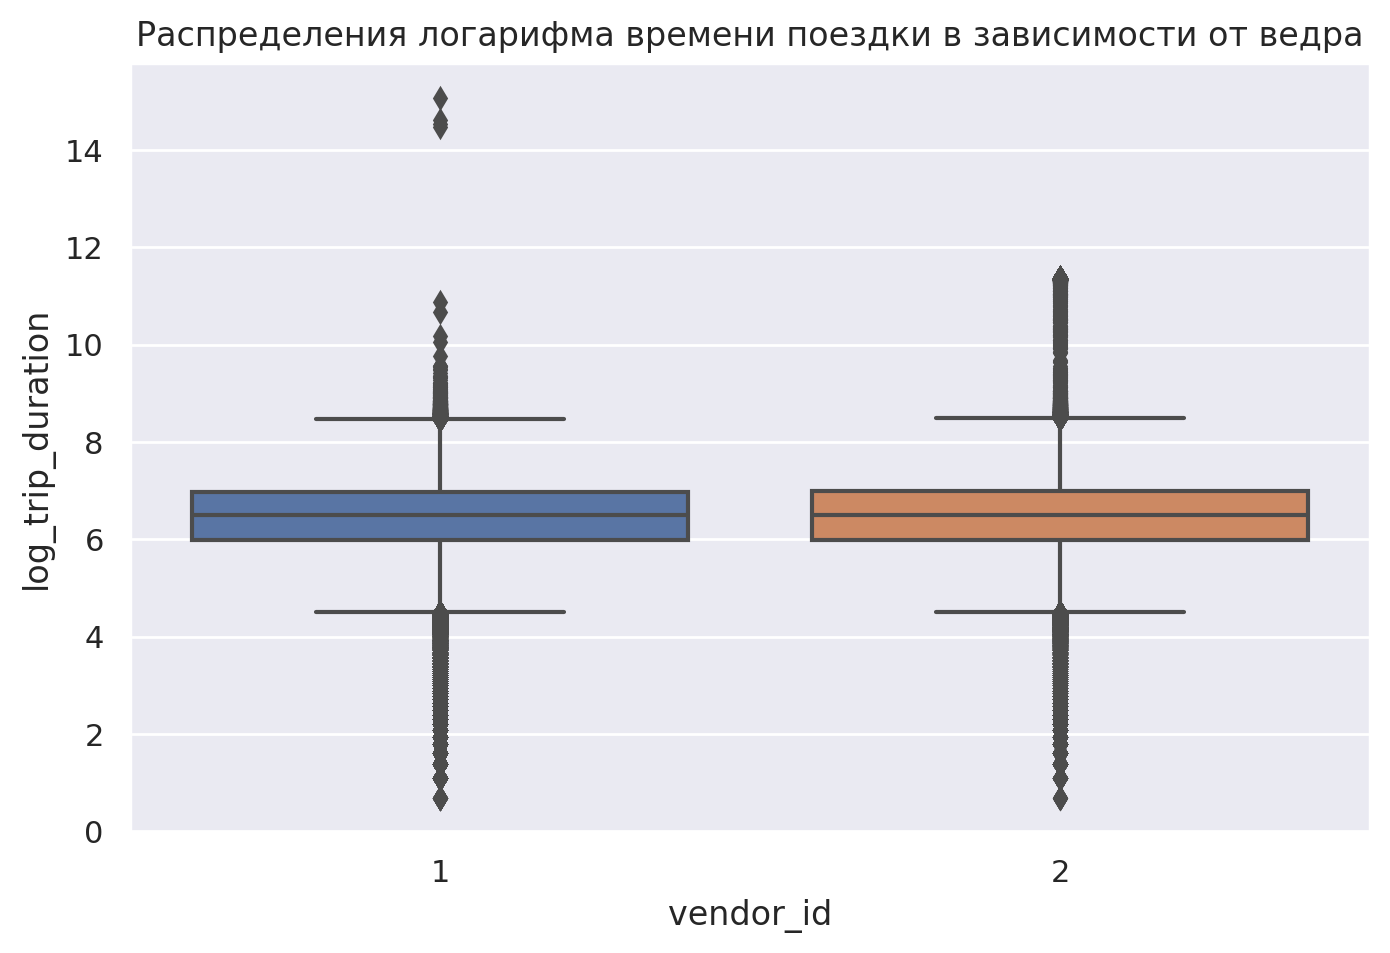

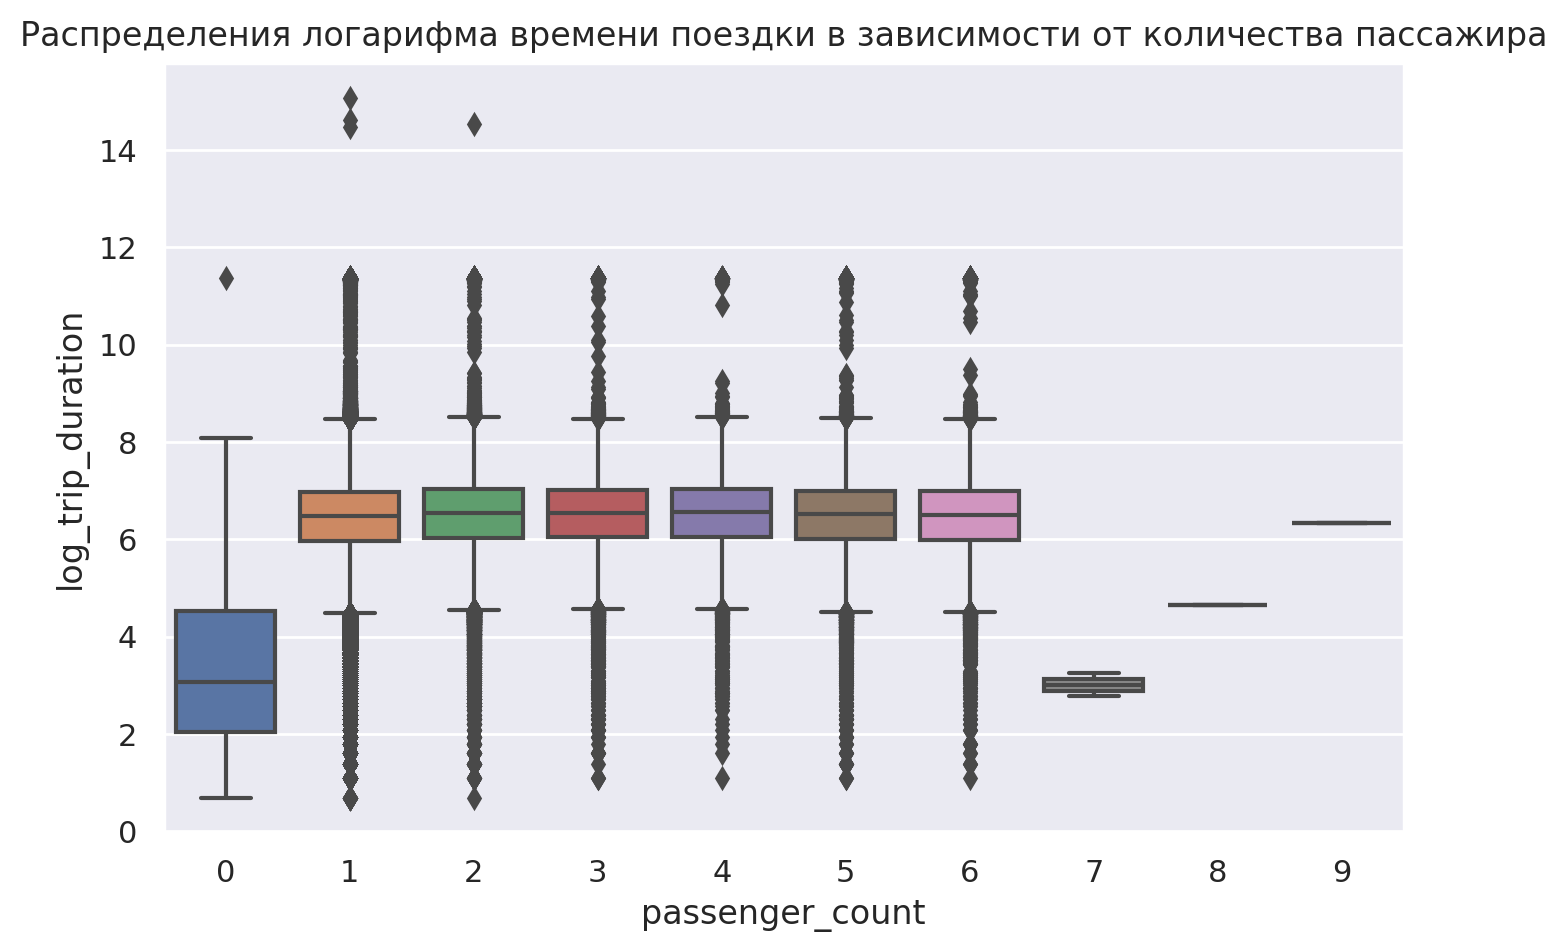

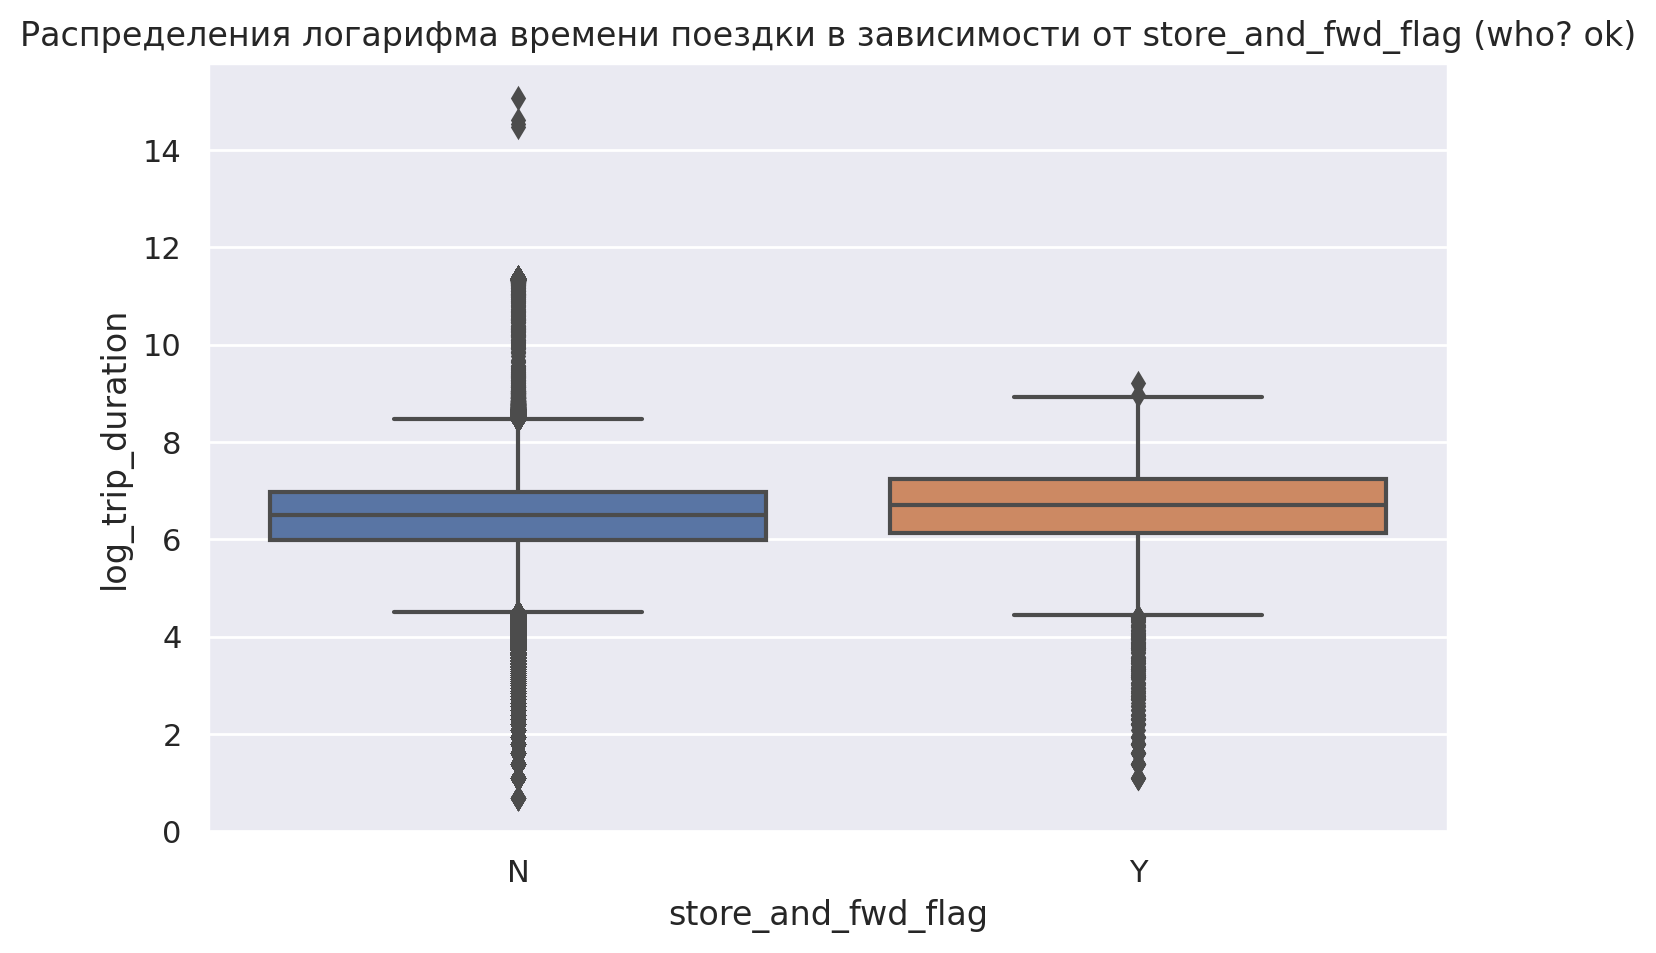

In [127]:
sns.boxplot(data=data, x='vendor_id', y='log_trip_duration')
plt.title('Распределения логарифма времени поездки в зависимости от ведра')
plt.show()
sns.boxplot(data=data, x='passenger_count', y='log_trip_duration')
plt.title('Распределения логарифма времени поездки в зависимости от количества пассажира')
plt.show()
sns.boxplot(data=data, x='store_and_fwd_flag', y='log_trip_duration')
plt.title('Распределения логарифма времени поездки в зависимости от store_and_fwd_flag (who? ok)')
plt.show()

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [128]:
data['vendor_id'] = np.where([(data['vendor_id'] == 2)][0],
                                1, 0)
data['store_and_fwd_flag'] = np.where([(data['store_and_fwd_flag'])][0],
                                1, 0)

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

Выглядит крайне бесперспективно))

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [130]:
y = data["log_trip_duration"]
X = data.drop(columns=["log_trip_duration"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

if 'hour' in X_train:
    X_train = X_train.drop(columns=['hour'])
if 'month' in X_train:
    X_train = X_train.drop(columns=['month'])
if 'day' in X_train:
    X_train = X_train.drop(columns=['day'])
if 'hour' in X_test:
    X_test = X_test.drop(columns=['hour'])
if 'month' in X_test:
    X_test = X_test.drop(columns=['month'])
if 'day' in X_test:
    X_test = X_test.drop(columns=['day'])
X_train['dayofweek'] = X_train['pickup_datetime'].dt.dayofweek
X_train['month'] = X_train['pickup_datetime'].dt.month
X_train['hour'] = X_train['pickup_datetime'].dt.hour
X_train['dayofyear'] = X_train['pickup_datetime'].dt.dayofyear
X_train['is_abnormality'] = np.where([(X_train['pickup_datetime'].dt.date.astype(str) == '2016-01-23') |
                                     (X_train['pickup_datetime'].dt.date.astype(str) == '2016-01-24') |
                                     (X_train['pickup_datetime'].dt.date.astype(str) == '2016-05-30')][0], True, False)
X_test['dayofweek'] = X_test['pickup_datetime'].dt.dayofweek
X_test['month'] = X_test['pickup_datetime'].dt.month
X_test['hour'] = X_test['pickup_datetime'].dt.hour
X_test['dayofyear'] = X_test['pickup_datetime'].dt.dayofyear
X_test['is_abnormality'] = np.where([(X_test['pickup_datetime'].dt.date.astype(str) == '2016-01-23') |
                                     (X_test['pickup_datetime'].dt.date.astype(str) == '2016-01-24') |
                                     (X_test['pickup_datetime'].dt.date.astype(str) == '2016-05-30')][0], True, False)

categorical = ['dayofweek', 'hour', 'is_abnormality', 'jam', 'free', 'start_place1', 'start_place1', 'finish_place1', 'finish_place2',
              'vendor_id', 'store_and_fwd_flag', 'passenger_count']

numeric_features = ['month', 'dayofyear', 'log_haversine']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features),
    ('anime', MapGridTransformer(), ["pickup_latitude","pickup_longitude", "dropoff_latitude", "dropoff_longitude"]),
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge()),
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.4715


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

капельку дали, но мы крошки с пола не собираем и выкидываем этот мусор

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты (выбросы, или outliers): с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите __обучающую выборку__ от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

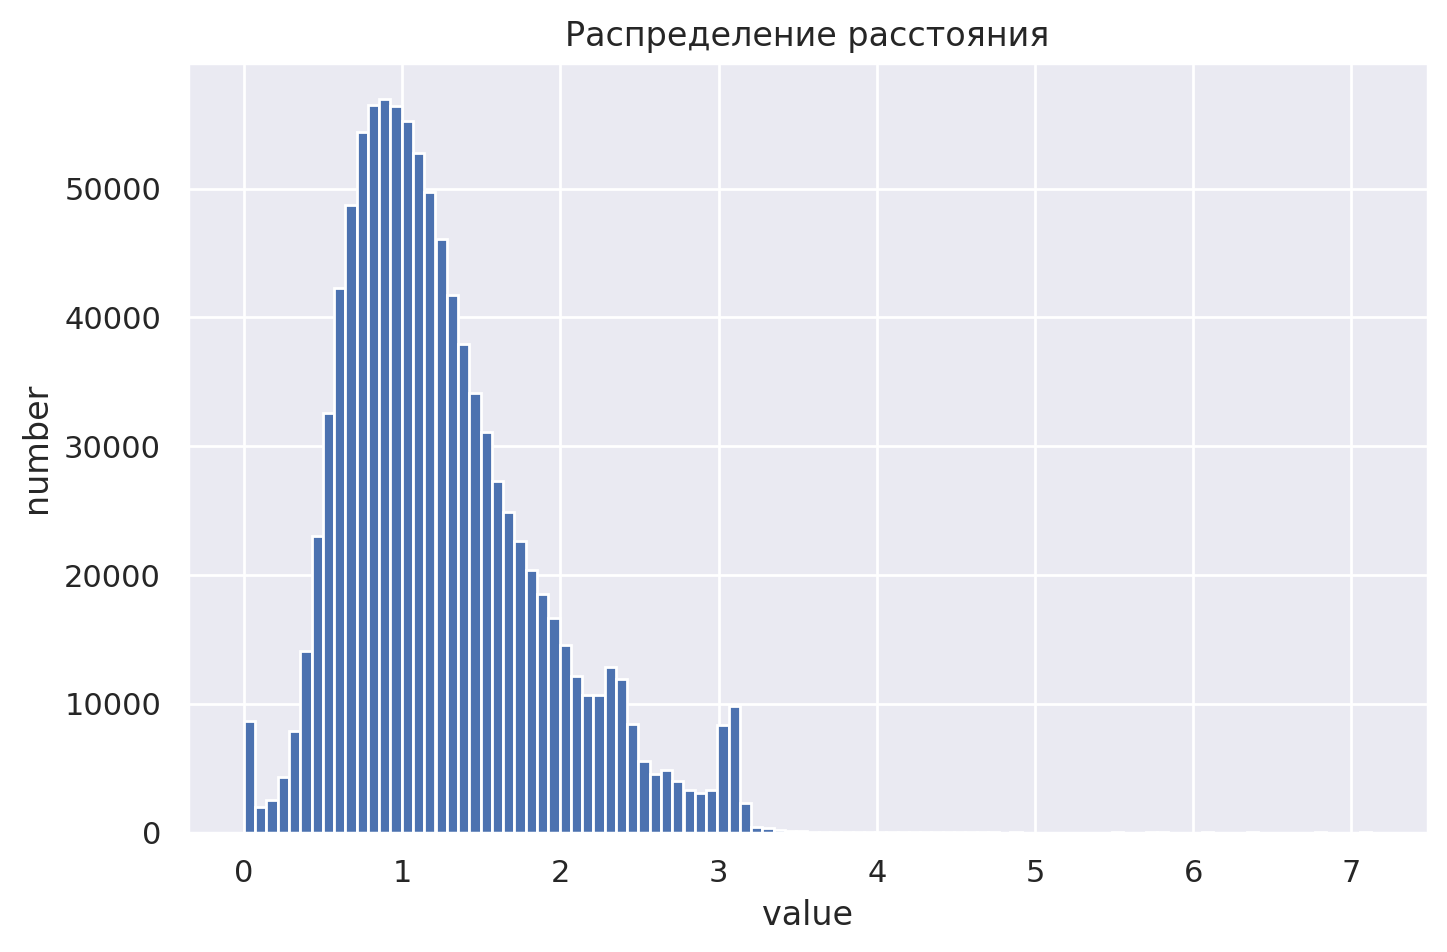

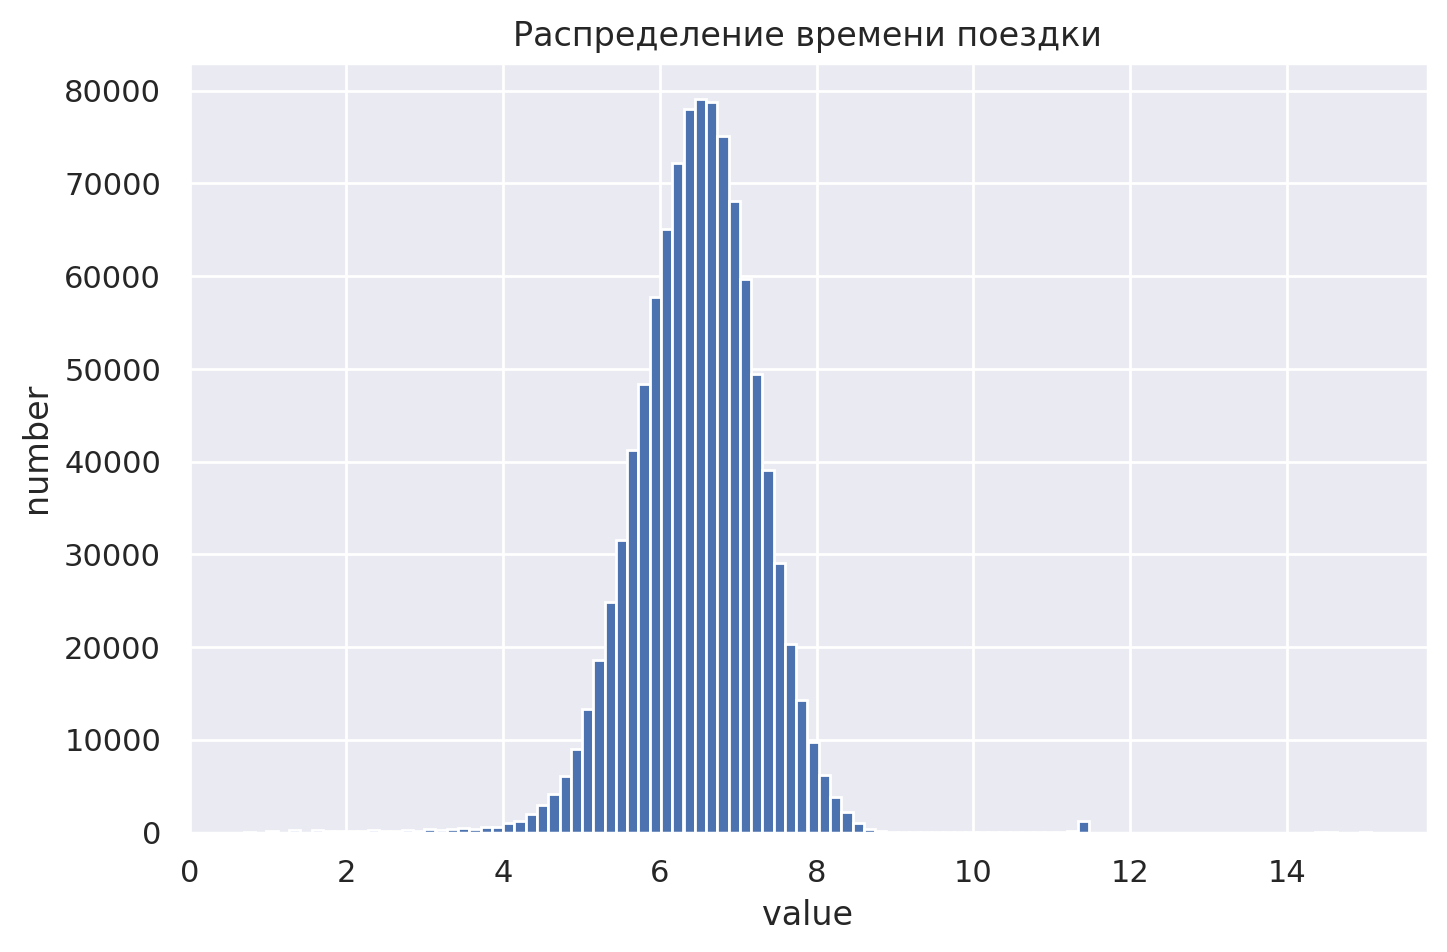

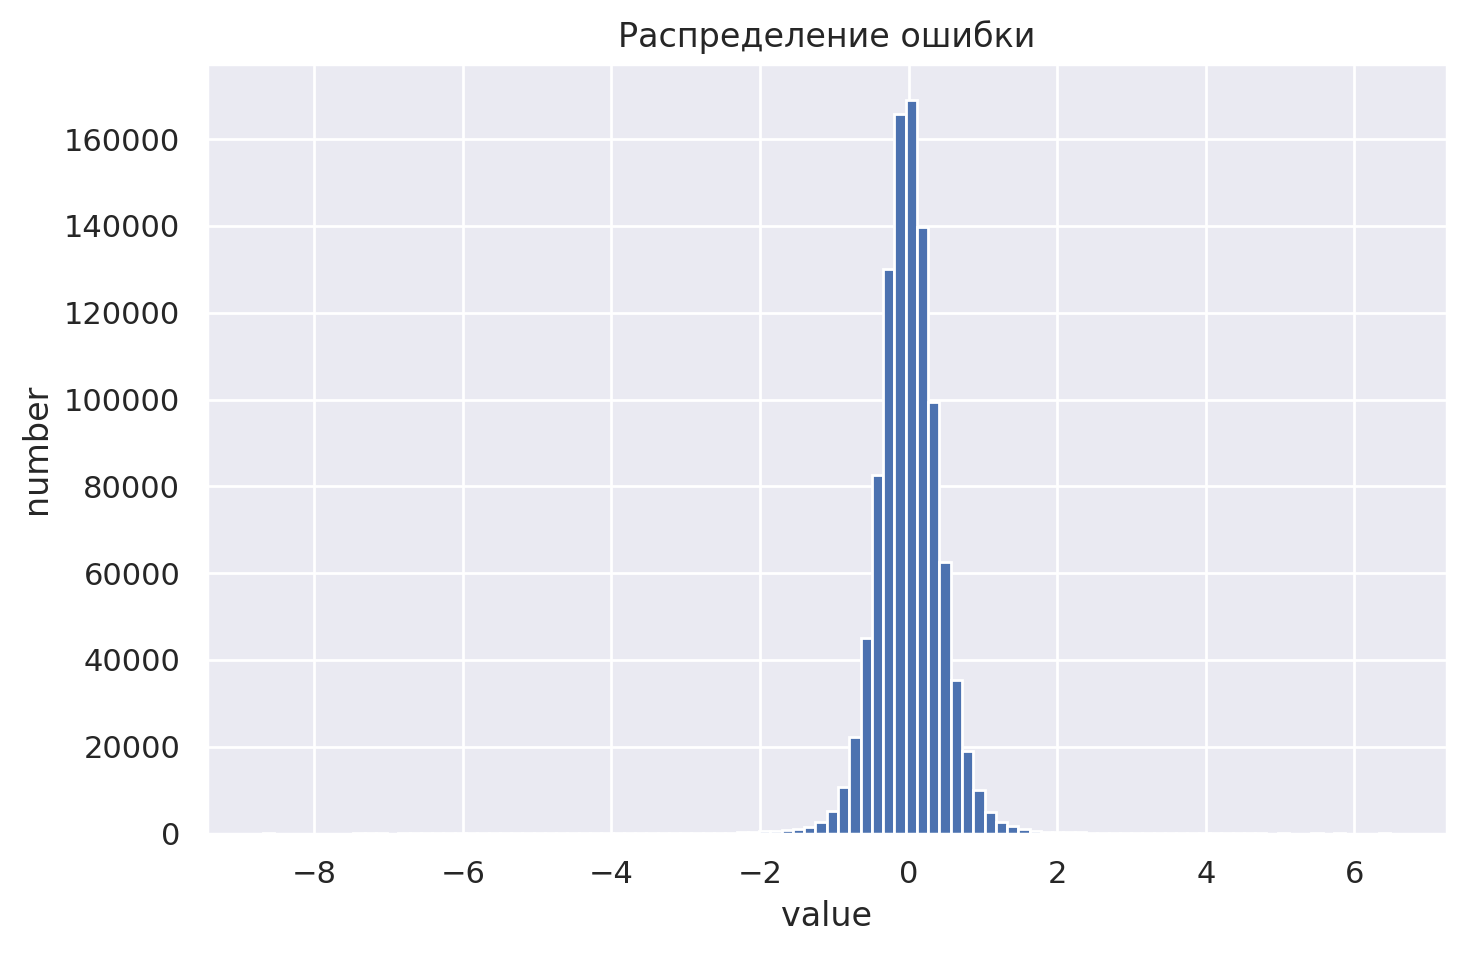

In [131]:
X_train['log_trip_duration'] = y_train

plt.hist(X_train['log_haversine'], bins=100)
plt.xlabel('value')
plt.ylabel('number')
plt.title('Распределение расстояния')
plt.show()

plt.hist(X_train['log_trip_duration'], bins=100)
plt.xlabel('value')
plt.ylabel('number')
plt.title('Распределение времени поездки')
plt.show()

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_train)

plt.hist(y_pred - y_train, bins=100)
plt.xlabel('value')
plt.ylabel('number')
plt.title('Распределение ошибки')
plt.show()

In [132]:
X_train['tmp_column'] = y_pred - y_train
X_train = X_train[((X_train['tmp_column'] > -4) & (X_train['tmp_column'] < 4))]
X_train = X_train[((X_train['log_haversine'] > 0) & (X_train['log_haversine'] < 5))]
X_train = X_train[((X_train['log_trip_duration'] > 2) & (X_train['log_trip_duration'] < 10))]
y_train = X_train['log_trip_duration']
X_train = X_train.drop(columns=['tmp_column', 'log_trip_duration'])

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие). 

In [133]:
categorical = ['dayofweek', 'hour', 'is_abnormality', 'jam', 'free', 'start_place1', 'start_place1', 'finish_place1', 'finish_place2',
               'passenger_count']

numeric_features = ['month', 'dayofyear', 'log_haversine']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="infrequent_if_exist", min_frequency=10), categorical),
    ('scaling', StandardScaler(), numeric_features),
    ('anime', MapGridTransformer(), ["pickup_latitude","pickup_longitude", "dropoff_latitude", "dropoff_longitude"]),
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge()),
])
model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.4716


Либо я криворукий косоглазый либо нифига не помогло, либо https://scikit-learn.org меня обманул и infrequent_if_exist говно

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [136]:
print(f"ДоЖ {len(categorical)}\n\
После: {OneHotEncoder(handle_unknown='infrequent_if_exist', min_frequency=10).fit_transform(X_train[categorical]).shape[1]}")


ДоЖ 10
После: 53


Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [137]:
from sklearn.linear_model import Lasso

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="infrequent_if_exist", min_frequency=10), categorical),
    ('scaling', StandardScaler(), numeric_features),
    ('anime', MapGridTransformer(), ["pickup_latitude","pickup_longitude", "dropoff_latitude", "dropoff_longitude"]),
])

lasso_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso())
])

model = lasso_pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

RMSE = 0.7943


Говно какое-то, раньше было лучше

Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [138]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.3, random_state=10)

from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-2, 3, 20)
searcher = GridSearchCV(Lasso(), [{"alpha": alphas}], scoring="neg_root_mean_squared_error", cv=10)
searcher.fit(StandardScaler().fit_transform(X_validate[numeric_features]), y_validate)

lasso_best_alpha = searcher.best_params_["alpha"]
print("Lasso best alpha = %.4f" % lasso_best_alpha)

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="infrequent_if_exist", min_frequency=10), categorical),
    ('scaling', StandardScaler(), numeric_features),
    ('anime', MapGridTransformer(), ["pickup_latitude","pickup_longitude", "dropoff_latitude", "dropoff_longitude"]),
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(alpha=lasso_best_alpha)),
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Lasso test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

alphas = np.logspace(-2, 3, 20)
searcher = GridSearchCV(Ridge(), [{"alpha": alphas}], scoring="neg_root_mean_squared_error", cv=10)
searcher.fit(StandardScaler().fit_transform(X_validate[numeric_features]), y_validate)

ridge_best_alpha = searcher.best_params_["alpha"]
print("Ridge best alpha = %.4f" % ridge_best_alpha)

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="infrequent_if_exist", min_frequency=10), categorical),
    ('scaling', StandardScaler(), numeric_features),
    ('anime', MapGridTransformer(), ["pickup_latitude","pickup_longitude", "dropoff_latitude", "dropoff_longitude"]),
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(alpha=ridge_best_alpha)),
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Ridge test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))




Lasso best alpha = 0.0100
Lasso test RMSE = 0.4971
Ridge best alpha = 88.5867
Ridge test RMSE = 0.4718


Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

Text(0, 0.5, 'CV score')

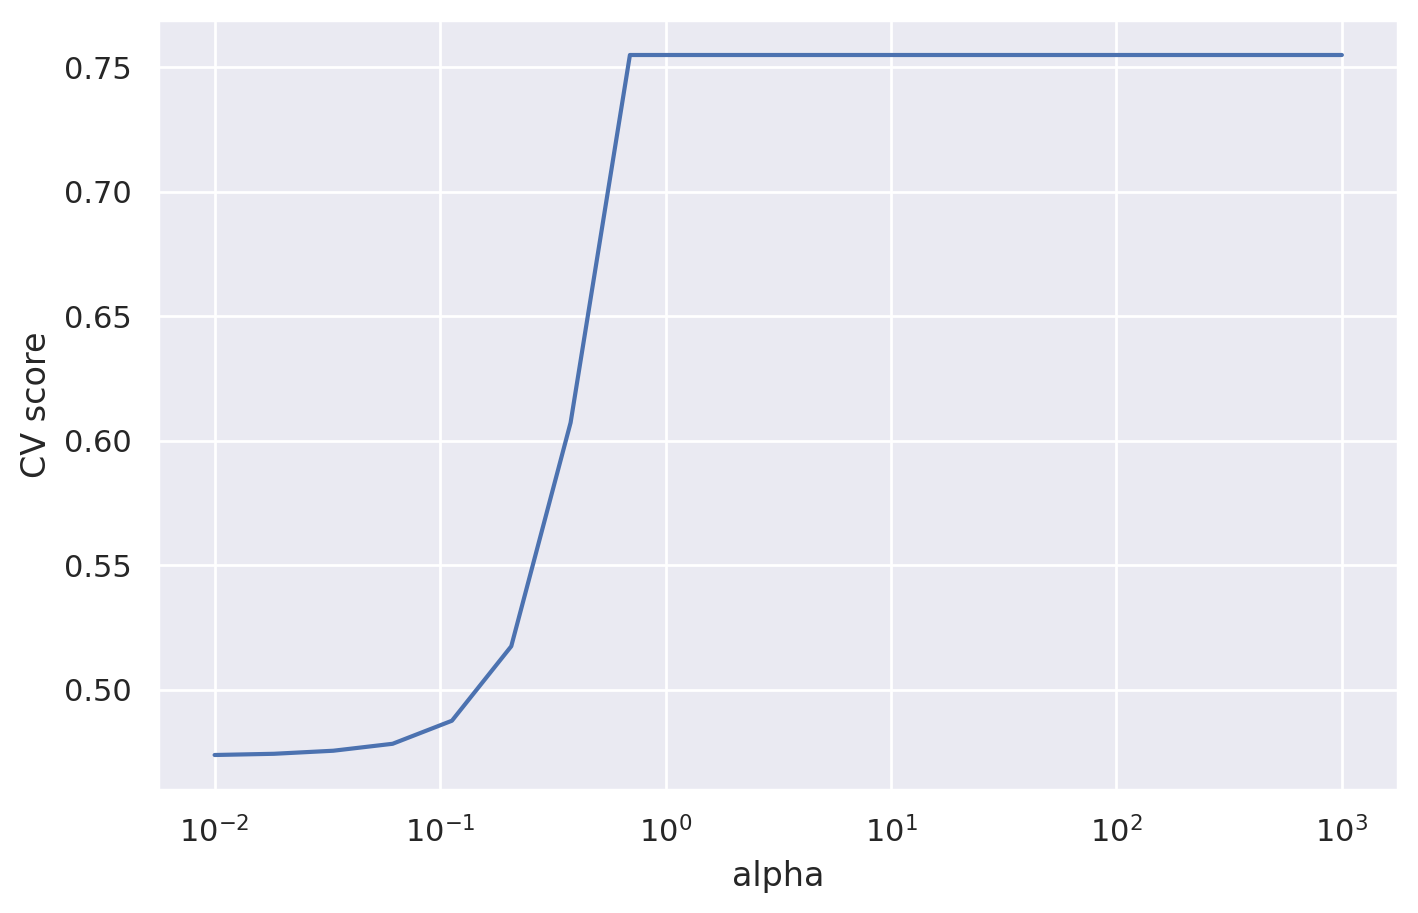

In [139]:
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-2, 3, 20)
searcher = GridSearchCV(Lasso(), [{"alpha": alphas}], scoring="neg_root_mean_squared_error", cv=10)
searcher.fit(StandardScaler().fit_transform(X_validate[numeric_features]), y_validate)

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

Также можете придумать ещё какой-нибудь способ сделать признаки про маршрут. Если эти признаки будут давать хороший прирост в качестве, то за это могут быть даны дополнительные бонусные баллы.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

In [141]:
number = 7
min_latitude, max_latitude, min_longitude, max_longitude =  40.702724, 40.798956, -74.051596, -73.925856
step_latitude = (max_latitude - min_latitude) / number
step_longitude = (max_longitude - min_longitude) / number

X_train['tmp_start'] = np.where([((X_train['pickup_longitude'] >= min_longitude) & (X_train['pickup_longitude'] <= max_longitude) &
                         (X_train['pickup_latitude'] >= min_latitude) & (X_train['pickup_latitude'] <= max_latitude))][0],
                        ((X_train['pickup_latitude'] - min_latitude) // step_latitude) * number +
                        (X_train['pickup_longitude'] - min_longitude) // step_longitude
                        , -1)
X_train['tmp_finish'] = np.where([((X_train['dropoff_longitude'] >= min_longitude) & (X_train['dropoff_longitude'] <= max_longitude) &
                         (X_train['dropoff_latitude'] >= min_latitude) & (X_train['dropoff_latitude'] <= max_latitude))][0],
                        ((X_train['dropoff_latitude'] - min_latitude) // step_latitude) * number +
                        (X_train['dropoff_longitude'] - min_longitude) // step_longitude
                        , -1)
X_train['start_finish'] = X_train['tmp_start'] * (number + 10)**2 + X_train['tmp_finish']
X_train = X_train.drop(columns=['tmp_start', 'tmp_finish'])

X_test['tmp_start'] = np.where([((X_test['pickup_longitude'] >= min_longitude) & (X_test['pickup_longitude'] <= max_longitude) &
                         (X_test['pickup_latitude'] >= min_latitude) & (X_test['pickup_latitude'] <= max_latitude))][0],
                        ((X_test['pickup_latitude'] - min_latitude) // step_latitude) * number +
                        (X_test['pickup_longitude'] - min_longitude) // step_longitude
                        , -1)
X_test['tmp_finish'] = np.where([((X_test['dropoff_longitude'] >= min_longitude) & (X_test['dropoff_longitude'] <= max_longitude) &
                         (X_test['dropoff_latitude'] >= min_latitude) & (X_test['dropoff_latitude'] <= max_latitude))][0],
                        ((X_test['dropoff_latitude'] - min_latitude) // step_latitude) * number +
                        (X_test['dropoff_longitude'] - min_longitude) // step_longitude
                        , -1)
X_test['start_finish'] = X_test['tmp_start'] * (number + 10)**2 + X_test['tmp_finish']
X_test = X_test.drop(columns=['tmp_start', 'tmp_finish'])

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [142]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="infrequent_if_exist", min_frequency=10), categorical),
    ('hentai', OneHotEncoder(handle_unknown="infrequent_if_exist", max_categories=100), ['start_finish']),
    ('scaling', StandardScaler(), numeric_features),
    ('anime', MapGridTransformer(), ["pickup_latitude","pickup_longitude", "dropoff_latitude", "dropoff_longitude"]),
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(alpha=ridge_best_alpha)),
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Ridge test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Ridge test RMSE = 0.4625


**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут). 

In [164]:
def manhattan_array(lat1, lng1, lat2, lng2, line1lat1, line1lng1, line1lat2, line1lng2, line2lat1, line2lng1, line2lat2, line2lng2):
    def point_to_line_dist(lat, lng, linelat1, linelng1, linelat2, linelng2):
        return (((linelat2 - linelat1) * lng - (linelng2 - linelng1) * lat + linelng2 * linelat1 - linelat2 * linelng1).abs()) / np.sqrt((linelng2 - linelng1) * (linelng2 - linelng1) + (linelat2 - linelat1) * (linelat2 - linelat1))
    pickup_dist_to_first_line = point_to_line_dist(lat1, lng1, line1lat1, line1lng1, line1lat2, line1lng2)
    pickup_dist_to_second_line = point_to_line_dist(lat1, lng1, line2lat1, line2lng1, line2lat2, line2lng2)
    dropoff_dist_to_first_line = point_to_line_dist(lat2, lng2, line1lat1, line1lng1, line1lat2, line1lng2)
    dropoff_dist_to_second_line = point_to_line_dist(lat2, lng2, line2lat1, line2lng1, line2lat2, line2lng2)
    return ((pickup_dist_to_first_line - dropoff_dist_to_first_line).abs() + (dropoff_dist_to_first_line - dropoff_dist_to_second_line).abs())

line1lat1, line1lng1, line1lat2, line1lng2, line2lat1, line2lng1, line2lat2, line2lng2 = 40.761802, -74.000832, 40.752603, -73.978723, 40.740289, -73.986266, 40.768926, -73.965435
mapObj = folium.Map(location=(40.771032, -73.973104), zoom_start=13)
folium.PolyLine(
    locations=[[line1lat1, line1lng1], [line1lat2, line1lng2]],
    color="#FF0000",
    weight=3,
).add_to(mapObj)
folium.PolyLine(
    locations=[[line2lat1, line2lng1], [line2lat2, line2lng2]],
    color="#00FF00",
    weight=3,
).add_to(mapObj)
mapObj

X_train['manhattan'] = manhattan_array(X_train['pickup_latitude'], X_train['pickup_longitude'], X_train['dropoff_latitude'], X_train['dropoff_longitude'], line1lat1, line1lng1, line1lat2, line1lng2, line2lat1, line2lng1, line2lat2, line2lng2)
X_train['log_manhattan'] = np.log1p(X_train['manhattan'])
X_test['manhattan'] = manhattan_array(X_test['pickup_latitude'], X_test['pickup_longitude'], X_test['dropoff_latitude'], X_test['dropoff_longitude'], line1lat1, line1lng1, line1lat2, line1lng2, line2lat1, line2lng1, line2lat2, line2lng2)
X_test['log_manhattan'] = np.log1p(X_test['manhattan'])
print(f"Корреляция между log_haversine и таргетом {X_train['log_haversine'].corr(y_train)}")
print(f"Корреляция между log_manhattan и таргетом {X_train['log_manhattan'].corr(y_train)}")

Корреляция между log_haversine и таргетом 0.779365560947274
Корреляция между log_manhattan и таргетом 0.3659401504000112


Корреляция меньше :c


Но как будто ошибки нет, вроде все проверил

<img src="https://www.dropbox.com/scl/fi/m92ozdf6jlemiwzzx8xdr/manhattan_lines.png?rlkey=l4juh1eb1pitzl87vqoicp4n0&dl=0&raw=1" width="100%" align="right" style="margin-left: 20px">

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [165]:
categorical = ['dayofweek', 'hour', 'is_abnormality', 'jam', 'free', 'start_place1', 'start_place1', 'finish_place1', 'finish_place2',
               'passenger_count']

numeric_features = ['month', 'dayofyear', 'log_manhattan', 'log_haversine']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="infrequent_if_exist", min_frequency=10), categorical),
    ('hentai', OneHotEncoder(handle_unknown="infrequent_if_exist", max_categories=100), ['start_finish']),
    ('scaling', StandardScaler(), numeric_features),
    ('anime', MapGridTransformer(), ["pickup_latitude","pickup_longitude", "dropoff_latitude", "dropoff_longitude"]),
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(alpha=ridge_best_alpha)),
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Ridge test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Ridge test RMSE = 0.4599


 Если оставить и log_manhattan, и log_haversine, то ошибка станет меньше, значит победа (?)

**Задание 17 (бонус, 2 балла)**. Реализуйте трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения.

Признаки могут быть самые разные: расстояние между точкой старта и финиша, посчитанное в количестве шестиугольников; статистика по числу поездок и по их продолжительности в соседних шестиугольниках.

Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Измерьте качество после добавления новых признаков. За улучшение функционала ошибки на каждые 0.005 на тестовой выборке будет даваться 0.5 бонусных балла. Можно получить до 2 бонусных баллов за это задание.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.

<img src="https://www.dropbox.com/scl/fi/z3hn7c6mpoygo33s4ox44/photo_2023-10-18_16-22-49.jpg?rlkey=084j5byw0nfzni3sktjaizoyj&dl=0&raw=1" width="50%" align="center" style="margin-left: 20px">